# Data Analysis

## Task:
1. Do Univariate analysis of three variables describing the Sex, Nationality, and Age of the participants of the survey
2. Bivariate analysis of each of the three variables above (Sex, Nationality, and Age), with these four variables: Congruence, Dissonance, Koczkodaj, and CR


## 1. Importing the necessary libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np


#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

#Setting up plot styles
sns.set_style('whitegrid')
sns.set_context('poster') #larger fonts


#Displaying all the columns in the dataset
pd.set_option('max_columns', None)

## 2. Importing the datasets.

In [4]:
data = pd.read_csv('preprocessed1.csv')

data.head()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR_1,Congruence_1,Dissonance_1,Koczkodaj_1
0,2,8,2,8,1,8,3,8,1,8,1,8,1,3,3,4,2.75,Female,22.0,Nigeria,9,44,44,3,0.220400,1.039721,0.000000,0.875000
1,3,5,2,7,1,8,2,7,1,7,1,7,3,2,5,1,2.75,Male,30.0,France,16,15,66,3,0.206379,1.039721,0.083333,0.875000
2,3,7,2,7,3,6,2,7,1,8,1,8,2,-2,4,-1,0.75,Female,24.0,Russia,10,16,69,5,0.206379,1.039721,0.000000,0.875000
3,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.00,Female,23.0,India,25,25,25,25,0.000000,0.000000,0.000000,0.000000
4,2,7,2,8,1,6,2,7,1,7,1,9,2,3,4,5,3.50,Female,27.0,Nigeria,8,23,66,3,0.306177,1.743178,0.000000,0.836735


In [5]:
data.shape

(213, 28)

In [6]:
#Renaming consitency columns

data['CR'] = data['CR_1'] 
data['Congruence'] = data['Congruence_1']
data['Dissonance'] = data['Dissonance_1']
data['Koczkodaj'] = data['Koczkodaj_1']


data = data.drop(['CR_1', 'Congruence_1', 'Dissonance_1', 'Koczkodaj_1'], 1)

data.head()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
0,2,8,2,8,1,8,3,8,1,8,1,8,1,3,3,4,2.75,Female,22.0,Nigeria,9,44,44,3,0.220400,1.039721,0.000000,0.875000
1,3,5,2,7,1,8,2,7,1,7,1,7,3,2,5,1,2.75,Male,30.0,France,16,15,66,3,0.206379,1.039721,0.083333,0.875000
2,3,7,2,7,3,6,2,7,1,8,1,8,2,-2,4,-1,0.75,Female,24.0,Russia,10,16,69,5,0.206379,1.039721,0.000000,0.875000
3,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.00,Female,23.0,India,25,25,25,25,0.000000,0.000000,0.000000,0.000000
4,2,7,2,8,1,6,2,7,1,7,1,9,2,3,4,5,3.50,Female,27.0,Nigeria,8,23,66,3,0.306177,1.743178,0.000000,0.836735


In [7]:
#Checking the dimension of the dataset


print(f"The dataset has {data.shape[1]} columns, and {data.shape[0]} rows. That is:")

print(f"In the dataset gotten from the survey, we have {data.shape[0]} participants, and we have {data.shape[1]}  \
features/independent variables helping us describe each participant .")

The dataset has 28 columns, and 213 rows. That is:
In the dataset gotten from the survey, we have 213 participants, and we have 28  features/independent variables helping us describe each participant .


In [8]:
#Let's see the datatype of the variables in our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Q1          213 non-null    int64  
 1   Q1a         213 non-null    int64  
 2   Q2          213 non-null    int64  
 3   Q2a         213 non-null    int64  
 4   Q3          213 non-null    int64  
 5   Q3a         213 non-null    int64  
 6   Q4          213 non-null    int64  
 7   Q4a         213 non-null    int64  
 8   Q5          213 non-null    int64  
 9   Q5a         213 non-null    int64  
 10  Q6          213 non-null    int64  
 11  Q6a         213 non-null    int64  
 12  Q7          213 non-null    int64  
 13  Q7a         213 non-null    int64  
 14  Q8          213 non-null    int64  
 15  Q8a         213 non-null    int64  
 16  LOA         213 non-null    float64
 17  Q25         213 non-null    object 
 18  Q26         207 non-null    float64
 19  Q27         213 non-null    o

From the table above, the dataset has 26 numerical variables, and 2 categorical variables 

In [9]:
#The exlploratory data dictionary of the dataset
data.describe(include = 'all')

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213,207.000000,213,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.971831,7.323944,1.938967,7.370892,2.140845,7.657277,1.967136,7.276995,2.042254,7.539906,2.028169,7.605634,2.929577,2.934272,3.037559,3.413146,3.078638,NaN,28.202899,NaN,21.352113,17.530516,22.892019,38.230047,0.360064,1.341240,0.081768,0.762386
std,0.895036,1.457977,0.813235,1.327680,0.686029,1.328180,0.791374,1.461224,0.660973,1.297514,0.706543,1.268027,2.223315,2.100179,2.073757,1.946990,1.559731,NaN,5.654055,NaN,15.406228,14.091187,19.174290,23.094732,0.437875,0.819477,0.131254,0.299031
min,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,NaN,20.000000,NaN,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000,7.000000,2.000000,7.000000,1.000000,6.000000,2.000000,7.000000,2.000000,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,NaN,25.000000,NaN,9.000000,6.000000,7.000000,22.000000,0.174435,0.972955,0.000000,0.833333
50%,2.000000,8.000000,2.000000,7.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,3.000000,3.000000,3.000000,4.000000,3.250000,NaN,27.000000,NaN,18.000000,14.000000,17.000000,36.000000,0.247938,1.098612,0.000000,0.875000
75%,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,8.000000,2.000000,9.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,4.250000,NaN,30.000000,NaN,30.000000,25.000000,33.000000,63.000000,0.420125,1.945910,0.166667,0.888889


# 3. Checking for missing values

In [10]:
#Checking for missing data
data.isnull().sum()

Q1            0
Q1a           0
Q2            0
Q2a           0
Q3            0
Q3a           0
Q4            0
Q4a           0
Q5            0
Q5a           0
Q6            0
Q6a           0
Q7            0
Q7a           0
Q8            0
Q8a           0
LOA           0
Q25           0
Q26           6
Q27           0
W1            0
W2            0
W3            0
W4            0
CR            0
Congruence    0
Dissonance    0
Koczkodaj     0
dtype: int64

Only one variable has missing values. the variable, 'Q26' has two missing variables.

These variable is describing the ages of the participants. 
I will be filling these 2 missing values using three other columns from the dataset
    1. Q25: This variable is describing the sex of the participants of this survey.
    2. Q27: This variable is describing the nationality of the participants of this survey.
    3. LOA: This variable is describing the level of agreement.
    
Checking the participants with missing values.

In [11]:
data[(data['Q26'].isnull())]

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
7,3,9,3,9,3,9,3,9,3,9,1,9,5,5,5,5,5.0,Female,NaN,Nigeria,23,23,40,13,0.247938,1.098612,0.0,0.888889
18,3,9,3,9,2,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,NaN,Nigeria,13,23,23,40,0.247938,1.098612,0.0,0.888889
78,1,9,3,9,2,9,2,9,2,9,3,9,5,5,5,5,5.0,Female,NaN,Nigeria,17,3,29,51,0.247938,1.098612,0.0,0.888889
89,1,9,3,9,2,9,3,6,2,9,2,9,5,3,3,5,4.0,Male,NaN,Nigeria,14,5,8,73,0.247938,1.098612,0.0,0.888889
149,3,9,1,9,3,9,1,9,3,9,2,9,5,5,5,5,5.0,Female,NaN,Nigeria,32,32,4,32,0.000000,0.000000,0.0,0.000000
160,3,9,1,9,3,9,1,9,3,9,2,9,5,5,5,5,5.0,Male,NaN,Nigeria,32,32,4,32,0.000000,0.000000,0.0,0.000000


From the table above, we can see see the two participants with missing age values.
* The first participant is a female from Nigeria, with a level of agreement of 5.0
* The second participant is a male from Nigeria also, with a level of agreement of 5.0.


I will check other participants in our dataset with the same attributes as each of the two above. I.e.
To fill the first one, I will look for females in Nigeria with a level of agreement of 5, and find their average age. Likewise for the second participant ,I will look for males in Nigeria with a level of agreement of 5.0. 

In [12]:
#Females in Nigeria with a level of agreement of 5.0

data[(data['LOA'] == 5.0) & (data['Q25'] == 'Female') & (data['Q27'] == 'Nigeria')]

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
6,3,7,3,9,1,7,3,8,1,7,1,8,5,5,5,5,5.0,Female,32.0,Nigeria,32,32,33,4,0.000843,0.066766,0.000000,0.125000
7,3,9,3,9,3,9,3,9,3,9,1,9,5,5,5,5,5.0,Female,NaN,Nigeria,23,23,40,13,0.247938,1.098612,0.000000,0.888889
20,2,9,2,9,3,9,3,9,1,9,1,9,5,5,5,5,5.0,Female,26.0,Nigeria,5,45,45,5,0.000000,0.000000,0.000000,0.000000
37,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Female,29.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
38,3,6,1,7,2,7,1,7,1,7,2,7,5,5,5,5,5.0,Female,25.0,Nigeria,18,48,4,30,0.657434,1.945910,0.166667,0.979592
53,2,8,2,7,2,6,3,7,3,7,1,7,5,5,5,5,5.0,Female,30.0,Nigeria,4,30,48,17,0.178557,1.039721,0.000000,0.857143
64,3,9,3,9,3,9,3,9,3,8,3,8,5,5,5,5,5.0,Female,35.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
78,1,9,3,9,2,9,2,9,2,9,3,9,5,5,5,5,5.0,Female,NaN,Nigeria,17,3,29,51,0.247938,1.098612,0.000000,0.888889
91,1,9,3,9,2,9,2,9,2,9,2,9,5,5,5,5,5.0,Female,26.0,Nigeria,14,3,14,70,0.247938,1.098612,0.000000,0.888889
104,3,6,1,6,2,8,3,6,2,7,2,7,5,5,5,5,5.0,Female,31.0,Nigeria,15,10,6,70,0.174435,0.962645,0.083333,0.854167


In [13]:
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Female') & (data['Q27'] == 'Nigeria')].describe(include = 'all')

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0,15.0,15.0,15,12.000000,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.200000,8.000000,2.266667,8.333333,2.333333,8.266667,2.200000,8.133333,2.133333,8.133333,2.133333,8.133333,5.0,5.0,5.0,5.0,5.0,NaN,29.416667,NaN,19.066667,20.533333,24.000000,36.466667,0.243071,0.866697,0.044444,0.550134
std,0.941124,1.558387,0.883715,1.175139,0.617213,1.162919,0.861892,1.302013,0.743223,1.060099,0.833809,1.187234,0.0,0.0,0.0,0.0,0.0,NaN,3.502164,NaN,9.261801,15.027911,15.132746,22.815617,0.316874,0.841634,0.112980,0.449907
min,1.000000,4.000000,1.000000,6.000000,1.000000,6.000000,1.000000,5.000000,1.000000,6.000000,1.000000,5.000000,5.0,5.0,5.0,5.0,5.0,NaN,25.000000,NaN,4.000000,3.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.500000,1.500000,8.000000,2.000000,7.500000,1.500000,7.500000,2.000000,7.000000,1.500000,7.500000,5.0,5.0,5.0,5.0,5.0,NaN,26.000000,NaN,13.000000,7.000000,10.000000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9.000000,3.000000,9.000000,2.000000,9.000000,2.000000,9.000000,2.000000,9.000000,2.000000,9.000000,5.0,5.0,5.0,5.0,5.0,NaN,29.500000,NaN,18.000000,23.000000,25.000000,32.000000,0.178557,1.039721,0.000000,0.857143
75%,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,5.0,5.0,5.0,5.0,5.0,NaN,31.250000,NaN,25.000000,31.000000,32.500000,52.500000,0.247938,1.098612,0.000000,0.888889


In [14]:
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Female') & (data['Q27'] == 'Nigeria')]['Q26'].mean()

29.416666666666668

From the 2 tables above, we can see that there are 6 other participants in our survey who are females in Nigeria, with a level of agreeement of 5. The average age of these women is 29.5. Which is the value of the lady with the missing age.



Now I will be filling the first missing value.

In [21]:
missing_index_female =[7, 78, 149]

for index in missing_index_female:
    data.loc[index, 'Q26'] = np.float64(29)
    
    

In [22]:
#checking again to see the missing value.
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Female') & (data['Q27'] == 'Nigeria')]

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
6,3,7,3,9,1,7,3,8,1,7,1,8,5,5,5,5,5.0,Female,32.0,Nigeria,32,32,33,4,0.000843,0.066766,0.000000,0.125000
7,3,9,3,9,3,9,3,9,3,9,1,9,5,5,5,5,5.0,Female,29.0,Nigeria,23,23,40,13,0.247938,1.098612,0.000000,0.888889
20,2,9,2,9,3,9,3,9,1,9,1,9,5,5,5,5,5.0,Female,26.0,Nigeria,5,45,45,5,0.000000,0.000000,0.000000,0.000000
37,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Female,29.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
38,3,6,1,7,2,7,1,7,1,7,2,7,5,5,5,5,5.0,Female,25.0,Nigeria,18,48,4,30,0.657434,1.945910,0.166667,0.979592
53,2,8,2,7,2,6,3,7,3,7,1,7,5,5,5,5,5.0,Female,30.0,Nigeria,4,30,48,17,0.178557,1.039721,0.000000,0.857143
64,3,9,3,9,3,9,3,9,3,8,3,8,5,5,5,5,5.0,Female,35.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
78,1,9,3,9,2,9,2,9,2,9,3,9,5,5,5,5,5.0,Female,29.0,Nigeria,17,3,29,51,0.247938,1.098612,0.000000,0.888889
91,1,9,3,9,2,9,2,9,2,9,2,9,5,5,5,5,5.0,Female,26.0,Nigeria,14,3,14,70,0.247938,1.098612,0.000000,0.888889
104,3,6,1,6,2,8,3,6,2,7,2,7,5,5,5,5,5.0,Female,31.0,Nigeria,15,10,6,70,0.174435,0.962645,0.083333,0.854167


In [23]:
#Checking for men that are nigerians that have a level of agreement of 5.0

data[(data['LOA'] == 5.0) & (data['Q25'] == 'Male') & (data['Q27'] == 'Nigeria')]

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
18,3,9,3,9,2,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,NaN,Nigeria,13,23,23,40,0.247938,1.098612,0.000000,0.888889
27,1,9,3,9,1,9,3,9,1,9,1,9,5,5,5,5,5.0,Male,28.0,Nigeria,51,17,29,3,0.247938,1.098612,0.000000,0.888889
29,3,6,3,7,3,7,3,7,3,7,3,7,5,5,5,5,5.0,Male,30.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
55,2,8,2,8,2,9,2,9,1,9,1,9,5,5,5,5,5.0,Male,33.0,Nigeria,3,22,67,8,0.534595,2.256116,0.416667,0.901235
96,2,8,3,8,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,25.0,Nigeria,14,39,23,23,0.220400,1.039721,0.000000,0.875000
131,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,33.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
160,3,9,1,9,3,9,1,9,3,9,2,9,5,5,5,5,5.0,Male,NaN,Nigeria,32,32,4,32,0.000000,0.000000,0.000000,0.000000
169,1,9,1,9,2,9,2,9,1,9,2,9,5,5,5,5,5.0,Male,28.0,Nigeria,38,12,12,38,3.685470,4.394449,0.500000,0.998628
202,1,9,1,9,2,9,1,9,2,9,2,9,5,5,5,5,5.0,Male,33.0,Nigeria,22,8,2,68,0.503905,2.197225,0.000000,0.888889


In [24]:
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Male') & (data['Q27'] == 'Nigeria')].describe()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q26,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.111111,8.444444,2.222222,8.555556,2.333333,8.777778,2.333333,8.777778,2.222222,8.777778,2.222222,8.777778,5.0,5.0,5.0,5.0,5.0,30.000000,24.777778,22.555556,23.333333,29.111111,0.604472,1.342748,0.101852,0.604614
std,0.927961,1.013794,0.971825,0.726483,0.707107,0.666667,0.866025,0.666667,0.971825,0.666667,0.833333,0.666667,0.0,0.0,0.0,0.0,0.0,3.162278,14.368175,9.527737,19.045997,19.094793,1.172894,1.436019,0.203177,0.454897
min,1.000000,6.000000,1.000000,7.000000,1.000000,7.000000,1.000000,7.000000,1.000000,7.000000,1.000000,7.000000,5.0,5.0,5.0,5.0,5.0,25.000000,3.000000,8.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000,8.000000,2.000000,9.000000,2.000000,9.000000,1.000000,9.000000,2.000000,9.000000,5.0,5.0,5.0,5.0,5.0,28.000000,14.000000,17.000000,12.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,9.000000,3.000000,9.000000,2.000000,9.000000,3.000000,9.000000,3.000000,9.000000,2.000000,9.000000,5.0,5.0,5.0,5.0,5.0,30.000000,25.000000,23.000000,23.000000,25.000000,0.247938,1.098612,0.000000,0.888889
75%,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,5.0,5.0,5.0,5.0,5.0,33.000000,32.000000,25.000000,25.000000,38.000000,0.503905,2.197225,0.000000,0.888889
max,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,5.0,5.0,5.0,5.0,5.0,33.000000,51.000000,39.000000,67.000000,68.000000,3.685470,4.394449,0.500000,0.998628


In [25]:
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Male') & (data['Q27'] == 'Nigeria')]['Q26'].mean()

30.0

From the 2 tables above, we can see that only other participants share the same traits with the man with the missing values.
The average age of these men is 30.33. So I will fill the second missing value with 30.3

In [28]:
missing_index_male = [18, 89, 160]

for index in missing_index_male:
    data.loc[index, 'Q26'] = np.float64(30)
    
    
data[(data['LOA'] == 5.0) & (data['Q25'] == 'Male') & (data['Q27'] == 'Nigeria')]

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
18,3,9,3,9,2,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,30.0,Nigeria,13,23,23,40,0.247938,1.098612,0.000000,0.888889
27,1,9,3,9,1,9,3,9,1,9,1,9,5,5,5,5,5.0,Male,28.0,Nigeria,51,17,29,3,0.247938,1.098612,0.000000,0.888889
29,3,6,3,7,3,7,3,7,3,7,3,7,5,5,5,5,5.0,Male,30.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
55,2,8,2,8,2,9,2,9,1,9,1,9,5,5,5,5,5.0,Male,33.0,Nigeria,3,22,67,8,0.534595,2.256116,0.416667,0.901235
96,2,8,3,8,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,25.0,Nigeria,14,39,23,23,0.220400,1.039721,0.000000,0.875000
131,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.0,Male,33.0,Nigeria,25,25,25,25,0.000000,0.000000,0.000000,0.000000
160,3,9,1,9,3,9,1,9,3,9,2,9,5,5,5,5,5.0,Male,30.0,Nigeria,32,32,4,32,0.000000,0.000000,0.000000,0.000000
169,1,9,1,9,2,9,2,9,1,9,2,9,5,5,5,5,5.0,Male,28.0,Nigeria,38,12,12,38,3.685470,4.394449,0.500000,0.998628
202,1,9,1,9,2,9,1,9,2,9,2,9,5,5,5,5,5.0,Male,33.0,Nigeria,22,8,2,68,0.503905,2.197225,0.000000,0.888889


In [29]:
#Checking again for missing values in our dataset.
data['Q26'].isnull().sum()

0

## 4. UNIVARIATE ANALYSIS: Description of each variable
* Univariate analysis is the simplest form of data analysism, It is a way of looking at the characteristics of a single variable alone. 
* Ways to describe patterns found in univariate data.

* For Numerical data
    1. Central Tendency: a. Mean b. Median c. Mode
    2. Dispersion a. Range b. Variance c. Maximum, Minimum d. Quartiles e. Standard deviation


* For Categorical data
    1. Count/Null count
    

## 4.1 Numerical Variable

### 4.1.1 AGE - Described by the variable named Q26
* This variable is describing the different ages of the participants of the survey.


Firstly I will be looking at the descriptive statistics of their ages.

In [30]:
def table_descstat(variable, column_name=''):
    
    #For numerical variables
    if data[variable].dtype != 'O':    
        """Function to make a dataframe with the descriptive statistics of the variable."""
        table = pd.DataFrame(data[variable].describe())
        table.columns = [variable]

        #renaming the indices
        table.index = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median (50th Percentile)', '75th Percentile',
                   'Maximum']
        #Adding a new row with the mode.
        mode = pd.Series(data = {variable:data[variable].mode()[0]}, name = 'Mode')

        table = table.append(mode, ignore_index = False)

        table = pd.DataFrame(table[variable].round(3))

        #Renaming column names
        if variable == 'Q26':
            table.columns = ["AGE"]
            
    else:
        #Making a dataframe with the descriptive statistics of our dependent variable.
        table = pd.DataFrame(data[variable].describe(include = 'all')[:4])
        table.columns = [column_name]

        #renaming the indices
        table.index = ['Count', 'Unique', 'Top', 'Frequency']

        table = pd.DataFrame(table[column_name])

        
    return table

table_descstat('Q26')

,AGE
Count,213.000
Mean,28.239
Standard Deviation,5.578
Minimum,20.000
25th Percentile,25.000
Median (50th Percentile),27.000
75th Percentile,30.000
Maximum,60.000
Mode,25.000


* From the table above, we can see that the average age of the participants of the survey is 28.251.
* The age with the most frequency is 25 years of age.
* The youngest participant in the survey is 20 years old, and the oldest is 60 years old.
* The mean age is 28.251, and the median is 27. The mean is sligthly larger than the median, and most of the data is between the 0th and 75th percentile, i.e. Most of the participants of the survey are between ages 20 and 30. So this variable probably has a positive skew.
* This could also mean the presence of an outlier.

Checking the skew of the variable

In [31]:
print('Skewness of the age variable: ', data['Q26'].skew())

Skewness of the age variable:  2.7441752524883802


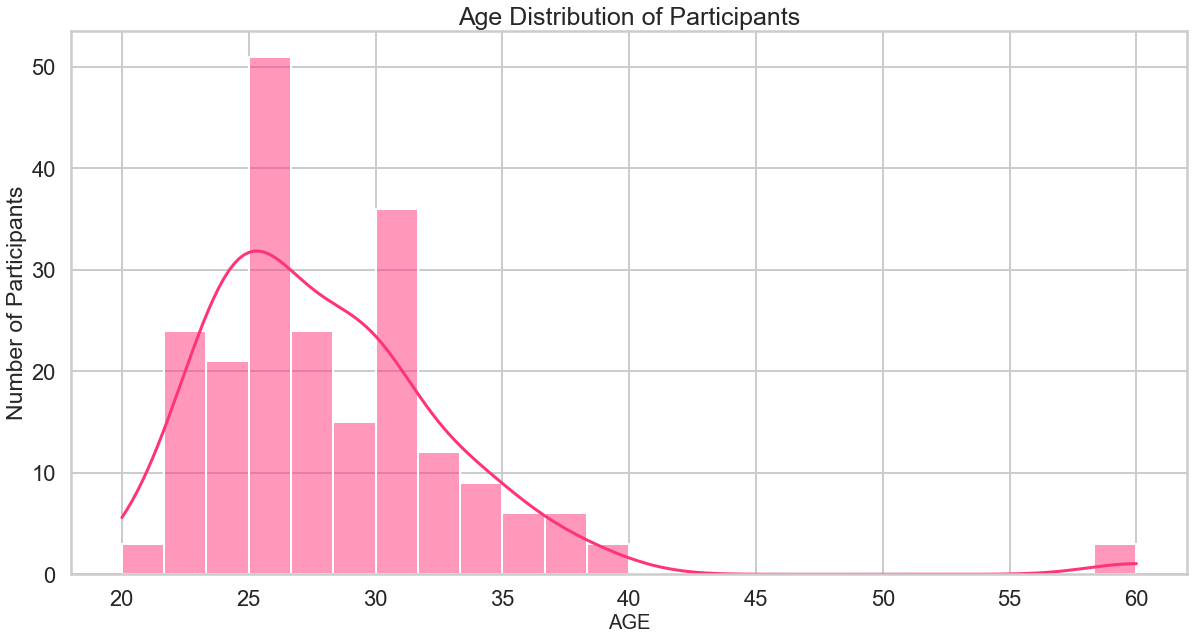

In [32]:
#Checking the distribution plot of the dependent variable
#I used a class/bin width = 1

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (20, 10))

sns.histplot(data['Q26'], kde = True, color =  '#ff3377')
plt.title("Age Distribution of Participants", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)
plt.xlabel("AGE", fontsize = 20)


plt.show()

From the distribution curve above, we can confirm that the age variable has a positive skew.


Now, I will check for outliers in the variable.


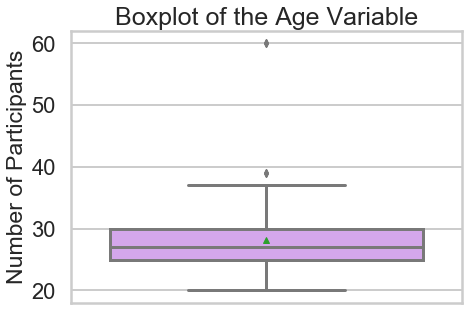

In [33]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'Q26', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the Age Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


The box plot above shows us that there are two outliers in this variable. I will not be treating this.






* Now I will turn the Age variable into a categorical variable for visualization and analysis sake, I will have like 4 or 5 age groups, and see which one has the highest count.


### Turning the numerical variable describing the age of participants into a categorical variable with 4 categories.

I will have 3 categories. The 3 categories will be:
    1. 19 to 35 years, 
    2. 35 to 50 years, and 
    3. 50 to 65 years 


I will plot a frequency distribution table of the categorical Age variable, then a count plot/bar chart.

Frequency distribution table of the age group of participants.


I will write  a function that will turn the numerical variable into a categorical variable, and then create a frequency distribution table from the created categorical variable.

In [34]:
data['Q27'].dtype == 'O'

True

In [35]:
def table_categorical(variable, column_name, bins = '', categories = ''):
    cat_name = variable + '_group'
    
    #For numerical variables
    if data[variable].dtype != 'O':

        """Creating the categories for the variable, and renaming the categories in the new categorical variable""" 
        x = pd.cut(data[variable].to_list(), bins = bins)
        x.categories = categories

        data[cat_name] = x

    
        """Making a frequency distribution table of the categorical variable that was just created"""
        table = {column_name: data[cat_name].unique(), 
               'Frequency': data[cat_name].sort_values().value_counts().to_list()}

        table = pd.DataFrame(table, columns = [column_name, 'Frequency'])

        table['Relative Frequency (%)'] = np.round((table['Frequency']/data.shape[0]) * 100, 1)
     
    #For categorical variables
    else:
        """Making a frequency distribution table of the categorical variable that was just created"""
        table = {column_name: data[variable].unique(), 
               'Frequency': data[variable].sort_values().value_counts().to_list()}

        table = pd.DataFrame(table, columns = [column_name, 'Frequency'])

        table['Relative Frequency (%)'] = np.round((table['Frequency']/data.shape[0]) * 100, 1)

    return table


#Applying this function to the Age variable.
table_categorical(variable = 'Q26', 
                  bins = [19.0, 35.0, 50.0, 65.0], 
                  categories =  ['19 to 35 years', '35 to 50 years', '50 to 65 years'], 
                  column_name = 'Age')

,Age,Frequency,Relative Frequency (%)
0,19 to 35 years,201,94.4
1,35 to 50 years,9,4.2
2,50 to 65 years,3,1.4


In [36]:
data.head()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q25,Q26,Q27,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj,Q26_group
0,2,8,2,8,1,8,3,8,1,8,1,8,1,3,3,4,2.75,Female,22.0,Nigeria,9,44,44,3,0.220400,1.039721,0.000000,0.875000,19 to 35 years
1,3,5,2,7,1,8,2,7,1,7,1,7,3,2,5,1,2.75,Male,30.0,France,16,15,66,3,0.206379,1.039721,0.083333,0.875000,19 to 35 years
2,3,7,2,7,3,6,2,7,1,8,1,8,2,-2,4,-1,0.75,Female,24.0,Russia,10,16,69,5,0.206379,1.039721,0.000000,0.875000,19 to 35 years
3,3,9,3,9,3,9,3,9,3,9,3,9,5,5,5,5,5.00,Female,23.0,India,25,25,25,25,0.000000,0.000000,0.000000,0.000000,19 to 35 years
4,2,7,2,8,1,6,2,7,1,7,1,9,2,3,4,5,3.50,Female,27.0,Nigeria,8,23,66,3,0.306177,1.743178,0.000000,0.836735,19 to 35 years


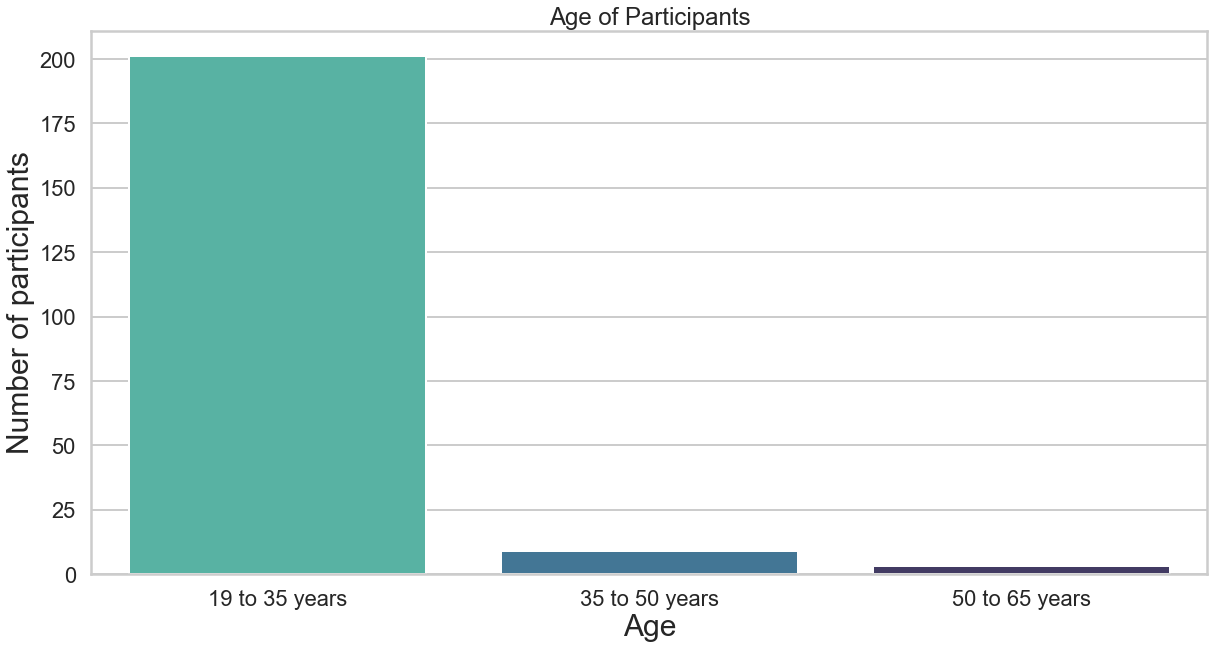

In [73]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['Q26_group'], data = data, palette = 'mako_r')
plt.title('Age of Participants')
plt.xlabel('Age', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

From the frequency distribution table andthe countplot above, we can see the that most of the participants, specifically 67 (94.4%) participants out of 71 are between the ages of 19 to 45 years








### 4.1.2 CR
* This variable is describing the different CR value of the participants of the survey.
* Generally for all the consistency measures, the lower they are the more consistent the participant is in answering questions.

The lower the CR value, the more consistent a participant is. 0 means perfect consistency. 

The CR consistency measure has a threshold of 0.1, that is any participant with a CR value of 0.1 or less is consistent, while anyone with a CR value greater than 0.1 is inconsistent.

Firstly I will be looking at the descriptive statistics of this consistency measure named CR

In [74]:
table_descstat('CR')



,CR
Count,213.000
Mean,0.360
Standard Deviation,0.438
Minimum,0.000
25th Percentile,0.174
Median (50th Percentile),0.248
75th Percentile,0.420
Maximum,3.685
Mode,0.248


The minimum and the maximum values for the CR measure is 0.000 and 2.548 respectively.

In the CR variable, the value 0.00 occured the most for the participants.

The average value of this variable is 0.342.


I will make a plot to show the distribution of this variable.

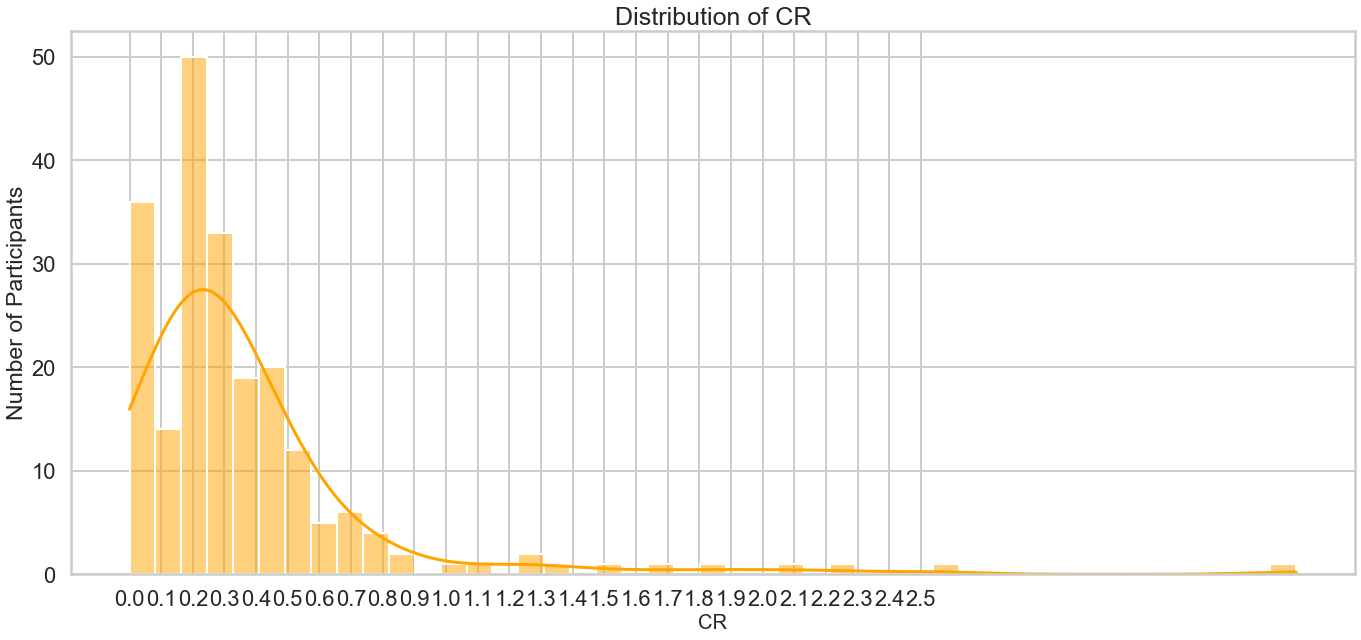

In [75]:
#Checking the distribution plot of the CR variable

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (23, 10))

sns.histplot(data['CR'], kde = True, color =  'orange')
plt.title("Distribution of CR", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)
plt.xlabel("CR", fontsize = 20)

plt.xticks(np.arange(0, 2.6, 0.1))
plt.show()

In [76]:
print("The number of participants with a CR value of 0.1 or less: " +  str(len(data[(data['CR'] <= 0.1)])) + ' participants' )

The number of participants with a CR value of 0.1 or less: 36 participants


From the plot above, we can see that most of the participant had a CR value > 0.1, i.e most of the participants were inconsistent.

The first bar represents the participants with a CR value of 0.1 or less.

There are just 16 of the 71 participants in our survey with a CR value <= 0.1. This proves that humans are generally incosistent.

Checking for outliers in the dataset.

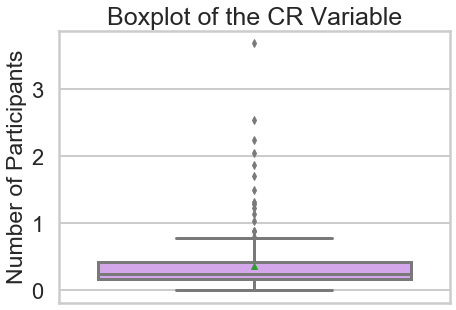

In [77]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'CR', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the CR Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


There are about 3 values in this variable, i.e. about 3 participants that had significantly higher CR values than most of the participants.





* Now I will turn the CR variable into a categorical variable for analysis sake.


### Turning the numerical variable describing the CR of participants into a categorical variable with 4 categories.

I will have 3 categories. The 3 categories will be:
    1. Low, 
    2. Medium, 
    3. High

In [78]:
table_categorical(variable = 'CR', 
                  bins = [-1.0000, 0.1, 1.698974, 3.7], 
                  categories =  ['Low', 'Medium', 'High'], 
                  column_name = 'CR')

,CR,Frequency,Relative Frequency (%)
0,Medium,171,80.3
1,Low,36,16.9
2,High,6,2.8


I will plot a frequency distribution table of the categorical CR variable, then a count plot/bar chart.

Frequency distribution table

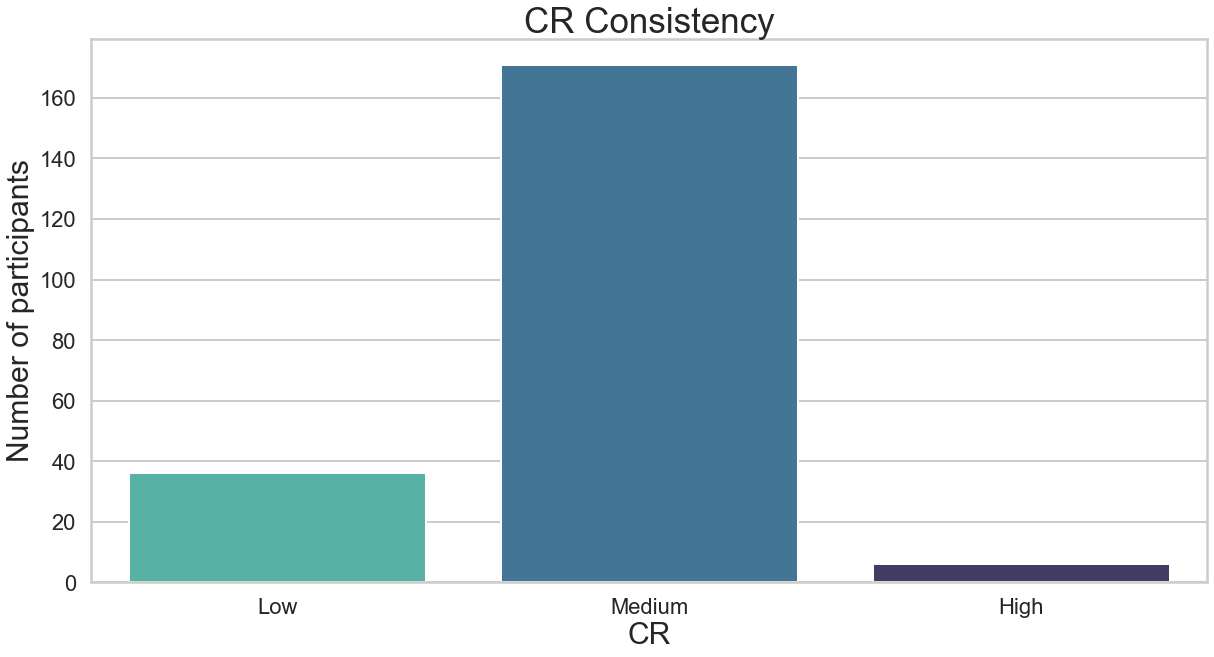

In [79]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['CR_group'], data = data, palette = 'mako_r')
plt.title('CR Consistency', fontsize = 35)
plt.xlabel('CR', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

Very few of our participants have low CR value, specifically 16 (22.5%) of them. This 22.5% are the participants that were consistent

### 4.1.3. Congruence.
* This variable is describing the different ages of the participants of the survey.

Generally the lower the congruence value of a participant is, the more consistent the participant is.

Firstly I will be looking at the descriptive statistics of this consistency measure named Congruence

In [80]:
table_descstat('Congruence')



,Congruence
Count,213.000
Mean,1.341
Standard Deviation,0.819
Minimum,0.000
25th Percentile,0.973
Median (50th Percentile),1.099
75th Percentile,1.946
Maximum,4.394
Mode,1.099


The minimum and the maximum values for the Congruence measure is 0.000 and 3.815 respectively.

In the Congruence variable, the value 0.00 occured the most for the participants.

The average value of this variable is 1.272.


I will make a plot to show the distribution of this variable.

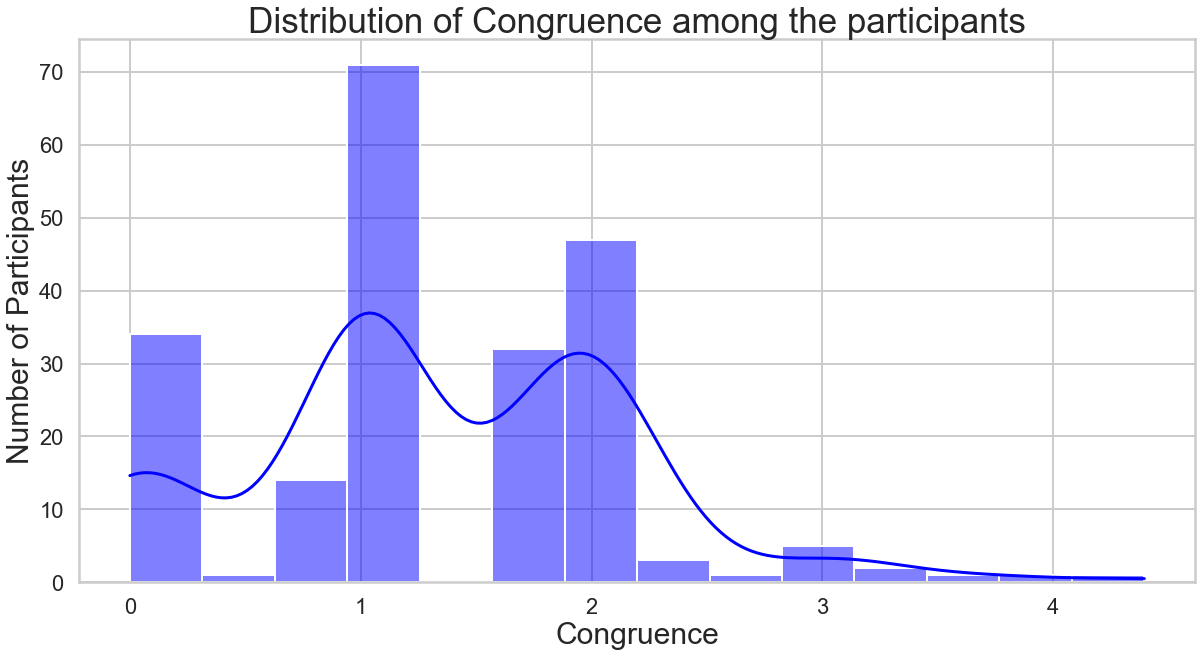

In [81]:
#Checking the distribution plot of the Congruence variable

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (20, 10))

sns.histplot(data['Congruence'], kde = True, color =  'blue')
plt.title("Distribution of Congruence among the participants", fontsize = 35)
plt.ylabel("Number of Participants", fontsize = 30)
plt.xlabel("Congruence", fontsize = 30)


plt.show()

For the Congruence consistency measure, few of the participants in the survey had low congruence values (less than 1.o)
Checking for outliers in the dataset.

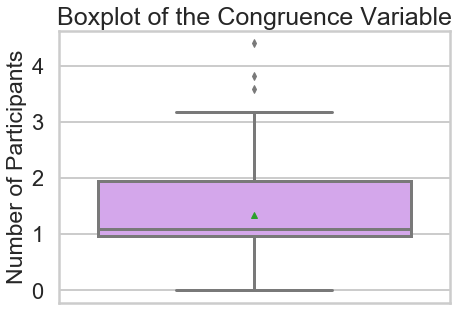

In [82]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'Congruence', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the Congruence Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


The Congruence variable has no outliers.





* Now I will turn the Congruence variable into a categorical variable for analysis sake.


### Turning the numerical variable describing the congruence of participants into a categorical variable with 4 categories.

I will have 3 categories. The 3 categories will be:
    1. Low, 
    2. Medium, 
    3. High


I will be using the 'pd.cut() method from the Pandas library for this

In [83]:
table_categorical(variable = 'Congruence', 
                  bins = [-1.0000, 1.0, 2.543163, 4.5], 
                  categories =  ['Low', 'Medium', 'High'], 
                  column_name = 'Congruence')

,Congruence,Frequency,Relative Frequency (%)
0,Medium,139,65.3
1,Low,63,29.6
2,High,11,5.2


I will plot a frequency distribution table of the categorical Congruence variable, then a count plot/bar chart.

Frequency distribution table

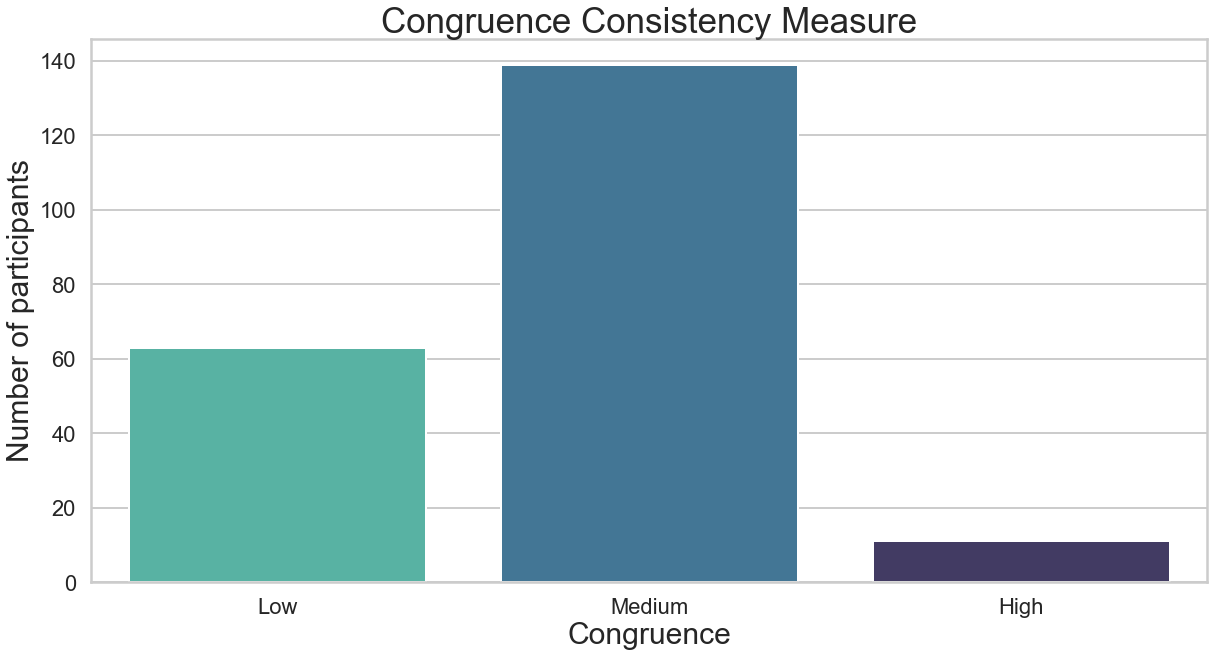

In [84]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['Congruence_group'], data = data, palette = 'mako_r')
plt.title('Congruence Consistency Measure', fontsize = 35)
plt.xlabel('Congruence', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

Just 22 (31%) of the participants had a low congruence value. Majority of the  participants had a medium congruence value. 


Only 2 people had high congruence values

### 4.1.4. Dissonance.
* This variable is describing the different congruence of the participants of the survey.

The lower the dissonance value of a participant, the more consistent such a participant is.

Firstly I will be looking at the descriptive statistics of this consistency measure named Dissonance

In [85]:
table_descstat('Dissonance')



,Dissonance
Count,213.000
Mean,0.082
Standard Deviation,0.131
Minimum,0.000
25th Percentile,0.000
Median (50th Percentile),0.000
75th Percentile,0.167
Maximum,0.583
Mode,0.000


The minimum and the maximum values for the Dissonance measure is 0.000 and 0.5 respectively.

In the Dissonance variable, the value 0.00 occured the most for the participants.

The average value of this variable is 0.070.


I will make a plot to show the distribution of this variable.

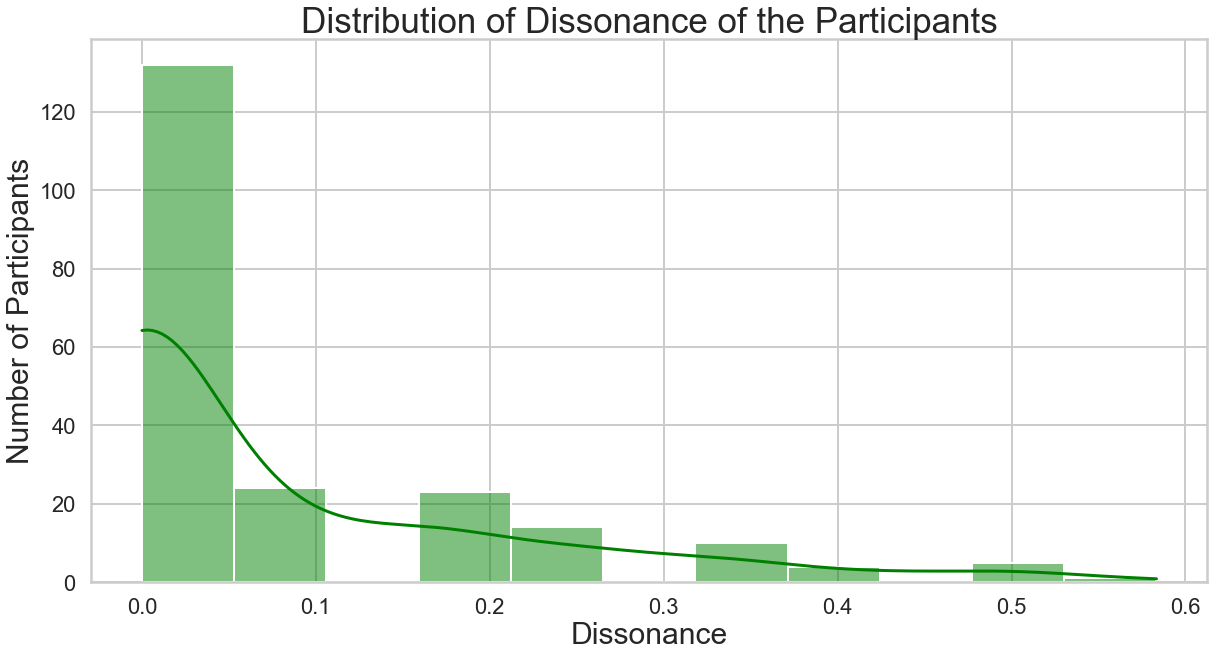

In [86]:
#Checking the distribution plot of the Dissonance variable

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (20, 10))

sns.histplot(data['Dissonance'], kde = True, color =  'green')
plt.title("Distribution of Dissonance of the Participants", fontsize = 35)
plt.ylabel("Number of Participants", fontsize = 30)
plt.xlabel("Dissonance", fontsize = 30)


plt.show()

For the Dissonance consistency measure, most of the participants in the survey had a value of 0.

The Dissonance consistency measure is telling us that most of the participants are actually consistent.

Checking for outliers in the variable.

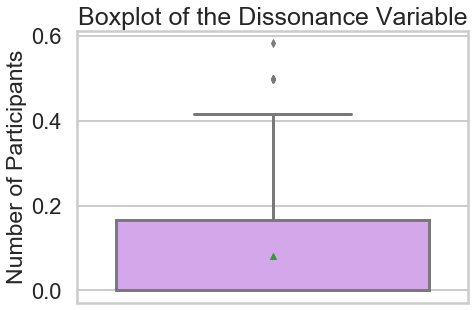

In [87]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'Dissonance', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the Dissonance Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


The Dissonance variable has 4 outliers.





* Now I will turn the Dissonance variable into a categorical variable for analysis sake.


### Turning the numerical variable describing the dissonance of participants into a categorical variable with 3 categories.

I will have 3 categories. The 3 categories will be:
    1. Low, 
    2. Medium, 
    3. High


I will be using the 'pd.cut() method from the Pandas library for this

In [88]:
data.describe()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q26,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.971831,7.323944,1.938967,7.370892,2.140845,7.657277,1.967136,7.276995,2.042254,7.539906,2.028169,7.605634,2.929577,2.934272,3.037559,3.413146,3.078638,28.239437,21.352113,17.530516,22.892019,38.230047,0.360064,1.341240,0.081768,0.762386
std,0.895036,1.457977,0.813235,1.327680,0.686029,1.328180,0.791374,1.461224,0.660973,1.297514,0.706543,1.268027,2.223315,2.100179,2.073757,1.946990,1.559731,5.578255,15.406228,14.091187,19.174290,23.094732,0.437875,0.819477,0.131254,0.299031
min,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,20.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000,7.000000,2.000000,7.000000,1.000000,6.000000,2.000000,7.000000,2.000000,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,25.000000,9.000000,6.000000,7.000000,22.000000,0.174435,0.972955,0.000000,0.833333
50%,2.000000,8.000000,2.000000,7.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,3.000000,3.000000,3.000000,4.000000,3.250000,27.000000,18.000000,14.000000,17.000000,36.000000,0.247938,1.098612,0.000000,0.875000
75%,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,8.000000,2.000000,9.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,4.250000,30.000000,30.000000,25.000000,33.000000,63.000000,0.420125,1.945910,0.166667,0.888889
max,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,60.000000,68.000000,66.000000,73.000000,75.000000,3.685470,4.394449,0.583333,0.998628


In [89]:
table_categorical(variable = 'Dissonance', 
                  bins = [-1.0000, 0.166667, 0.333333, 0.700000], 
                  categories =  ['Low', 'Medium', 'High'], 
                  column_name = 'Dissonance')

,Dissonance,Frequency,Relative Frequency (%)
0,Low,179,84.0
1,High,20,9.4
2,Medium,14,6.6


I will plot a frequency distribution table of the categorical Dissonance variable, then a count plot/bar chart.

Frequency distribution table

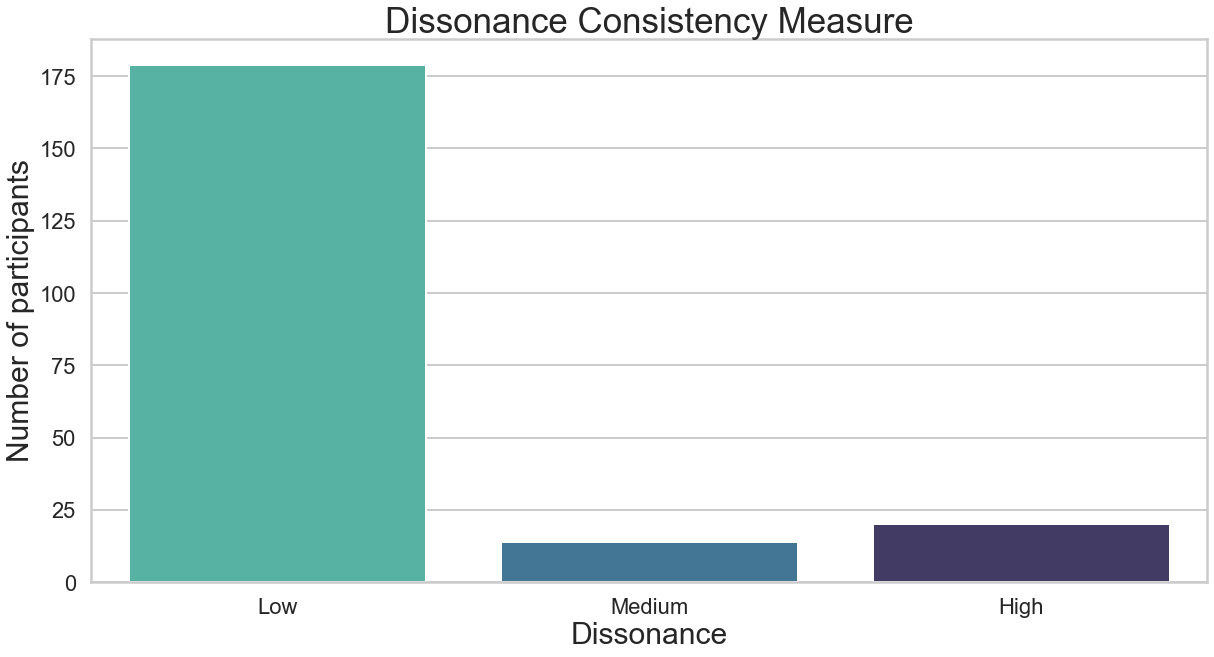

In [90]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['Dissonance_group'], data = data, palette = 'mako_r')
plt.title('Dissonance Consistency Measure', fontsize = 35)
plt.xlabel('Dissonance', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

32 (87.3%) of the participants had a low dissonance value. 


Only 4 people had high dissonance values

### 4.1.4. Koczkodaj.
* This variable is describing the different Koczkodaj of the participants of the survey.

The lower the Koczkodaj value, the more consistent a participant is. A Koczkodaj value of 0 means perfect consistency. 

The Koczkodaj consistency measure has a threshold of 1/3 (0.3333), that is any participant with a Koczkodaj value of 0.333 or less is consistent, while anyone with a CR value greater than 0.333 is inconsistent.

Firstly I will be looking at the descriptive statistics of this consistency measure named Koczkodaj

In [91]:
table_descstat('Koczkodaj')



,Koczkodaj
Count,213.000
Mean,0.762
Standard Deviation,0.299
Minimum,0.000
25th Percentile,0.833
Median (50th Percentile),0.875
75th Percentile,0.889
Maximum,0.999
Mode,0.889


The minimum and the maximum values for the Koczkodaj measure is 0.000 and 0.998 respectively.

In the Koczkodaj variable, the value 0.875 occured the most for the participants.

The average value of this variable is 0.716.


I will make a plot to show the distribution of this variable.

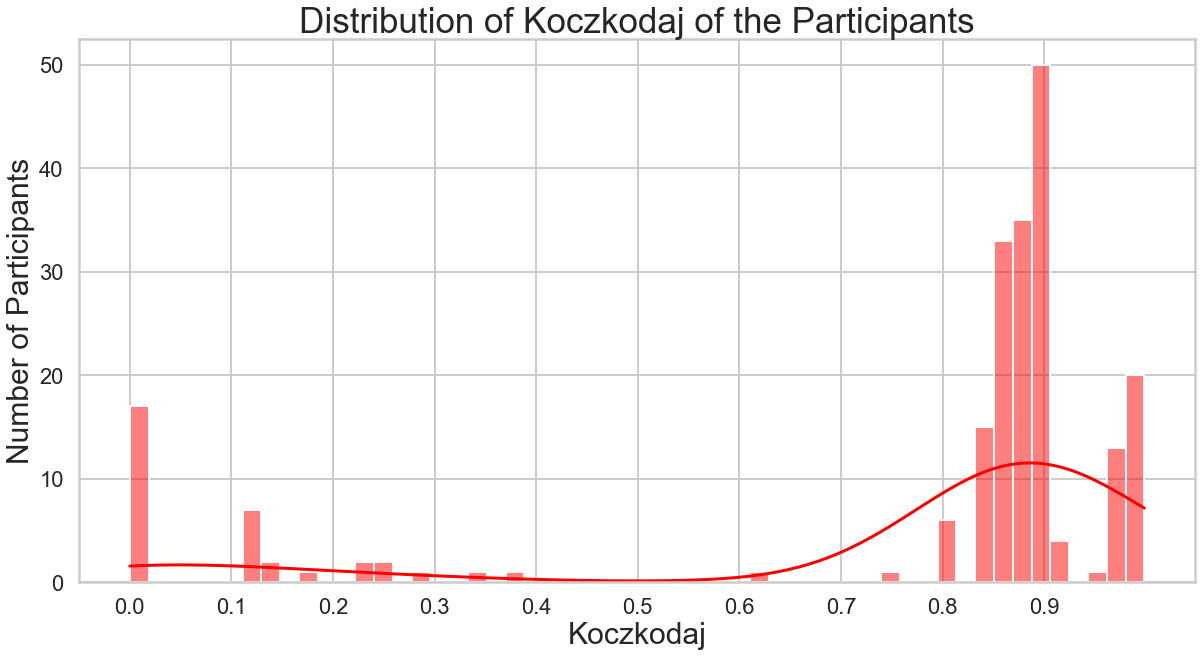

In [92]:
#Checking the distribution plot of the Koczkodaj variable

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (20, 10))

sns.histplot(data['Koczkodaj'], kde = True, color =  'red')
plt.title("Distribution of Koczkodaj of the Participants", fontsize = 35)
plt.ylabel("Number of Participants", fontsize = 30)
plt.xlabel("Koczkodaj", fontsize = 30)

plt.xticks(np.arange(0, 1.0, 0.1))
plt.show()

For the Koczkodaj consistency measure, most of the participants in the survey had a value higher than 0.3

This consistency measure is showing us that most of the participants are inconsistent.

Checking for outliers in the variable.

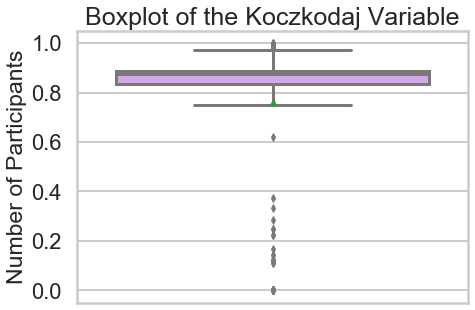

In [93]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'Koczkodaj', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the Koczkodaj Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


The Koczkokaj variable has 3 outliers. In this measure, the participants with low Koczkodaj values are the ones that are outliers. So this measure is so majority are inconsistent





* Now I will turn the Koczkodaj variable into a categorical variable for analysis sake.


### Turning the numerical variable describing the Koczkodaj measure of participants into a categorical variable with 3 categories.

I will have 3 categories. The 3 categories will be:
    1. Low, 
    2. Medium, 
    3. High


I will be using the 'pd.cut() method from the Pandas library for this

In [94]:
data.describe()

,Q1,Q1a,Q2,Q2a,Q3,Q3a,Q4,Q4a,Q5,Q5a,Q6,Q6a,Q7,Q7a,Q8,Q8a,LOA,Q26,W1,W2,W3,W4,CR,Congruence,Dissonance,Koczkodaj
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.971831,7.323944,1.938967,7.370892,2.140845,7.657277,1.967136,7.276995,2.042254,7.539906,2.028169,7.605634,2.929577,2.934272,3.037559,3.413146,3.078638,28.239437,21.352113,17.530516,22.892019,38.230047,0.360064,1.341240,0.081768,0.762386
std,0.895036,1.457977,0.813235,1.327680,0.686029,1.328180,0.791374,1.461224,0.660973,1.297514,0.706543,1.268027,2.223315,2.100179,2.073757,1.946990,1.559731,5.578255,15.406228,14.091187,19.174290,23.094732,0.437875,0.819477,0.131254,0.299031
min,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,20.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000,7.000000,2.000000,7.000000,1.000000,6.000000,2.000000,7.000000,2.000000,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,25.000000,9.000000,6.000000,7.000000,22.000000,0.174435,0.972955,0.000000,0.833333
50%,2.000000,8.000000,2.000000,7.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,3.000000,3.000000,3.000000,4.000000,3.250000,27.000000,18.000000,14.000000,17.000000,36.000000,0.247938,1.098612,0.000000,0.875000
75%,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,8.000000,2.000000,9.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,4.250000,30.000000,30.000000,25.000000,33.000000,63.000000,0.420125,1.945910,0.166667,0.888889
max,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,60.000000,68.000000,66.000000,73.000000,75.000000,3.685470,4.394449,0.583333,0.998628


In [95]:
table_categorical(variable = 'Koczkodaj', 
                  bins = [-1.0000, 0.33333, 1.0], 
                  categories =  ['Low', 'High'], 
                  column_name = 'Koczkodaj')

,Koczkodaj,Frequency,Relative Frequency (%)
0,High,181,85.0
1,Low,32,15.0


I will plot a frequency distribution table of the categorical Koczkodaj variable, then a count plot/bar chart.

Frequency distribution table

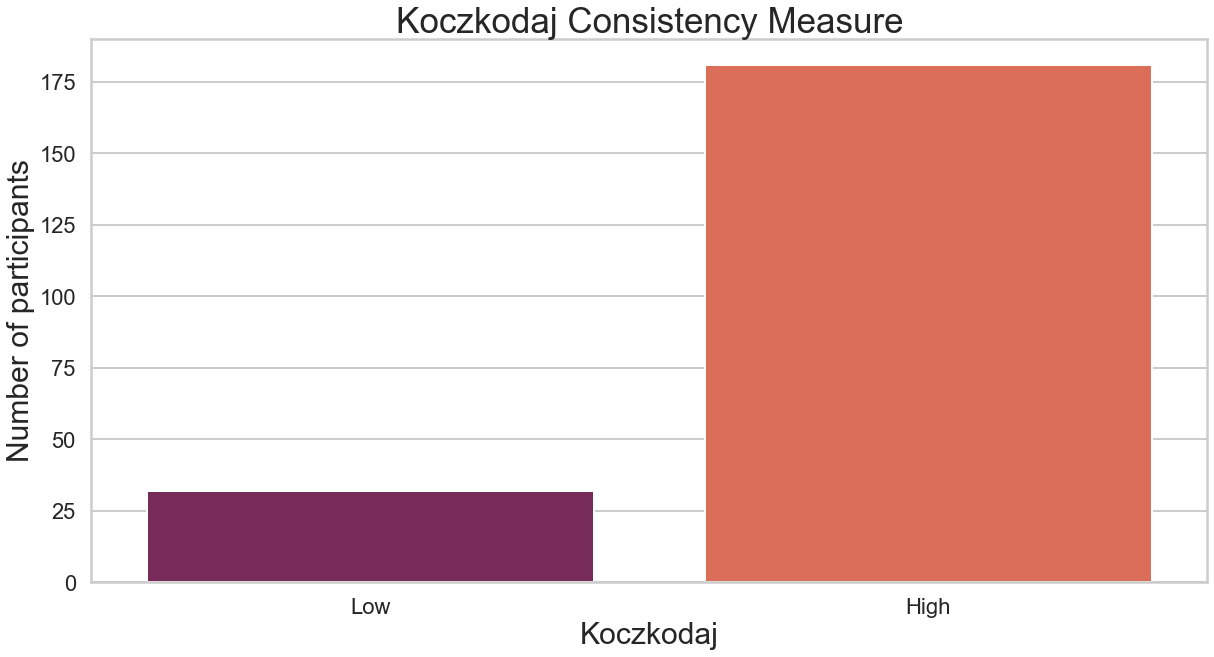

In [96]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['Koczkodaj_group'], data = data, palette = 'rocket')
plt.title('Koczkodaj Consistency Measure', fontsize = 35)
plt.xlabel('Koczkodaj', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

56 (78.9%) of the participants had a high Koczkodaj value. 


The remaining 15 (21.1%) participants had a low Koczkodaj value. According to the Koczkodaj consistency measure, only these 15 partcipants are consistent.

### 4.1.4. LOA (Level of Agreement)
* This variable is describing the different levels of agreement of the participants of the survey.


Firstly I will be looking at the descriptive statistics of this consistency measure named LOA

In [97]:
table_descstat('LOA')



,LOA
Count,213.000
Mean,3.079
Standard Deviation,1.560
Minimum,-5.000
25th Percentile,2.000
Median (50th Percentile),3.250
75th Percentile,4.250
Maximum,5.000
Mode,5.000


The minimum and the maximum values for the LOA measure is -1.750 and 5.000 respectively.

In the LOA variable, the value 5.000 occured the most for the participants.

The average value of this variable is 3.261.


I will make a plot to show the distribution of this variable.

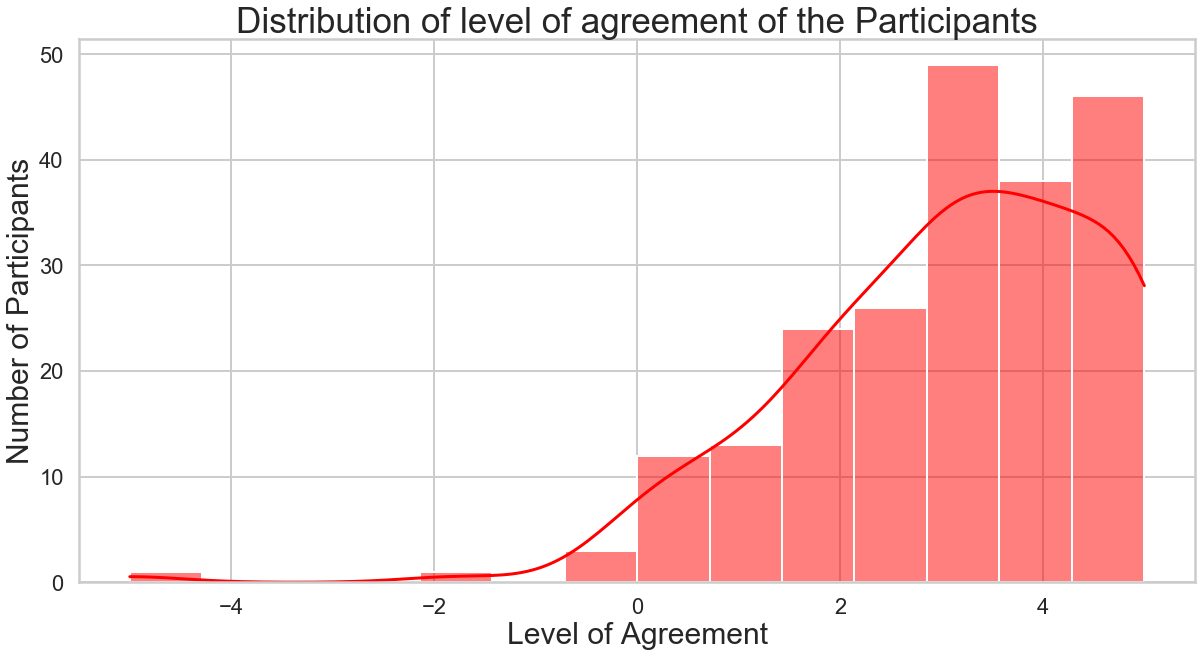

In [98]:
#Checking the distribution plot of the Koczkodaj variable

#Making the distriubtion plot of the ages of the participants of the survey.
plt.figure (figsize = (20, 10))

sns.histplot(data['LOA'], kde = True, color =  'red')
plt.title("Distribution of level of agreement of the Participants", fontsize = 35)
plt.ylabel("Number of Participants", fontsize = 30)
plt.xlabel("Level of Agreement", fontsize = 30)


plt.show()

For the level of agreement, most of the participants in the survey had a value of 5
Checking for outliers in the variable.

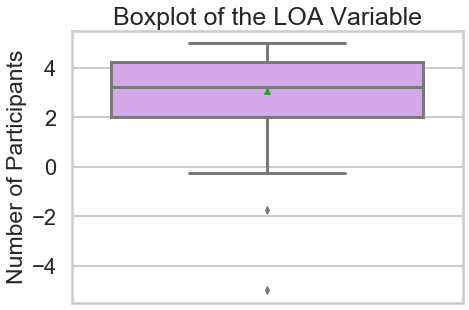

In [99]:
#Checking for outliers using a boxplot
plt.figure (figsize = (7, 5))
sns.boxplot(data = data, y = 'LOA', color="#d89cf6", showmeans=True)
plt.title("Boxplot of the LOA Variable", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 23)

plt.show()


The LOA variable has 1 outlier.





* Now I will turn the LOA variable into a categorical variable for analysis sake.


### Turning the numerical variable describing the level of agreement of participants into a categorical variable with 4 categories.

I will have 3 categories. The 3 categories will be:
    1. Low, 
    2. Medium, 
    3. High


I will be using the 'pd.cut() method from the Pandas library for this

In [114]:
table_categorical(variable = 'LOA', 
                  bins = [-6.000, 0, 2.0, 3.250, 5.000], 
                  categories =  ['Negative', 'Medium', 'High', 'Low'], 
                  column_name = 'Level of Agreement')

,Level of Agreement,Frequency,Relative Frequency (%)
0,High,100,46.9
1,Medium,59,27.7
2,Low,46,21.6
3,Negative,8,3.8


I will plot a frequency distribution table of the categorical Koczkodaj variable, then a count plot/bar chart.

Frequency distribution table

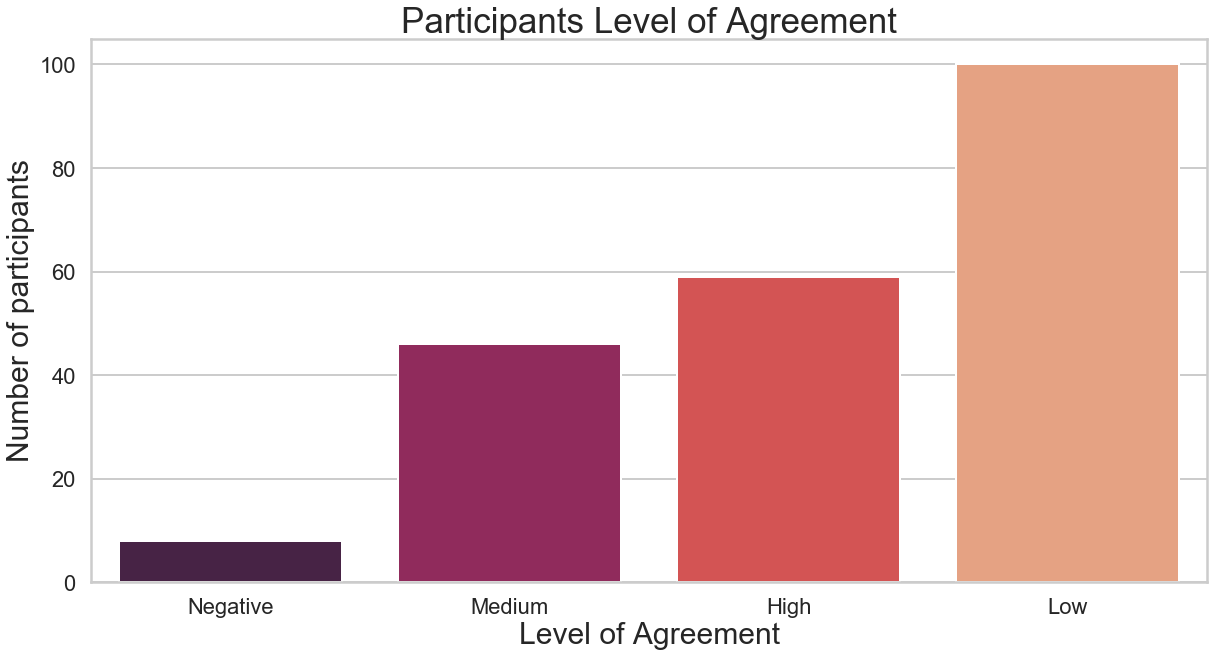

In [115]:
#Frequency distribution plot.
plt.figure(figsize=[20, 10])
sns.countplot(x = data['LOA_group'], data = data, palette = 'rocket')
plt.title('Participants Level of Agreement', fontsize = 35)
plt.xlabel('Level of Agreement', fontsize = 30)
plt.ylabel('Number of participants', fontsize = 30)
plt.show()

Majority of the participants have a high level of agreement, specifically 40 (56.3%) of the participants.

## 4.2 Categorical Variables.


### 4.2.1 SEX - Described by the variable named Q25.
I will first look at the descriptive statistics of this variable.

In [116]:
table_descstat('Q25', column_name = 'Sex')

,Sex
Count,213
Unique,2
Top,Male
Frequency,108


From the table above, we can see that this variable has 71 participants.
The variable has only 2 unique values, which are the sexes of the participants. These two values are Male and Female

I will make a frequency distribution plot of the variable, and a count plot to visualize the values in this variable.

In [117]:
table_categorical(variable = 'Q25', column_name = 'Sex')

,Sex,Frequency,Relative Frequency (%)
0,Female,108,50.7
1,Male,105,49.3


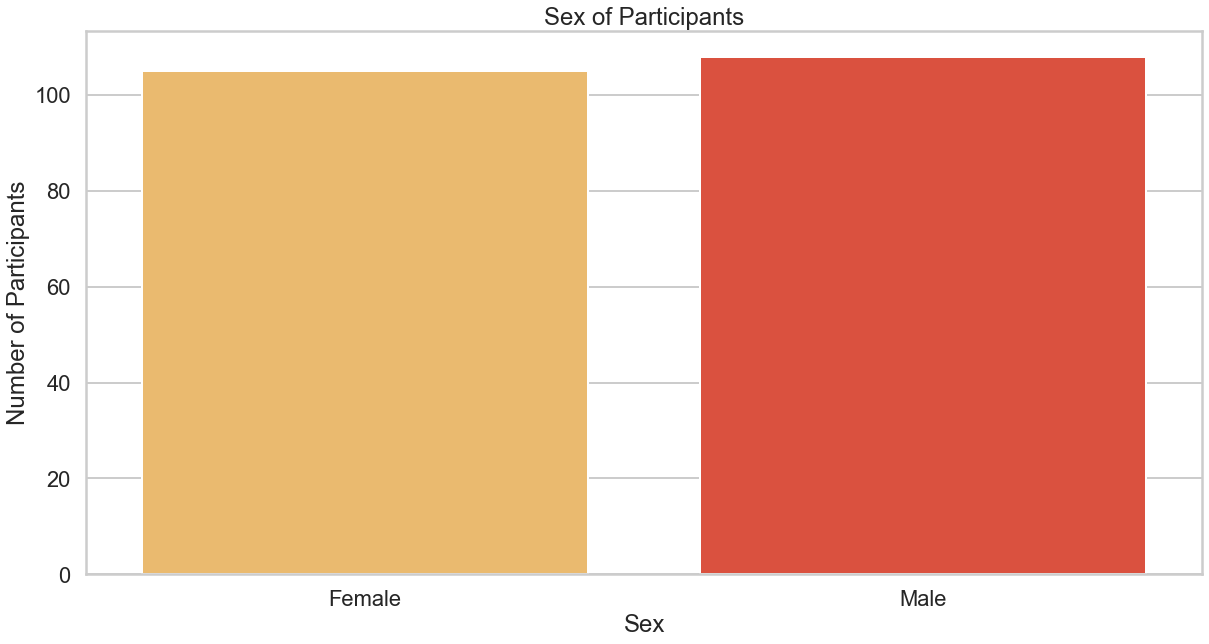

In [118]:
plt.figure(figsize=[20, 10])
sns.countplot(x = data['Q25'], palette = 'YlOrRd', data = data)
plt.title('Sex of Participants')
plt.ylabel('Number of Participants')
plt.xlabel('Sex')

plt.show()

The dataset has slightly more males 49.3% than females, We have 36 male participants, and 35 female participants.




### 4.2.2. NATIONALITY - Described by the variable named Q27.
I will first look at the descriptive statistics of this variable.

In [119]:
table_descstat('Q27')

,
Count,213
Unique,14
Top,Nigeria
Frequency,150


From the table above, we can see that this variable has 71 people/rows/records.

The people being considered in this dataset are from different countries. There are 14 different countries represented in this dataset. Majority of these people are from Nigeria.

I will make a frequency distribution plot of the variable, and a count plot to visualize these countries in this variable.

In [120]:
table_categorical(variable = 'Q27', column_name = 'Nationality')

,Nationality,Frequency,Relative Frequency (%)
0,Nigeria,150,70.4
1,France,12,5.6
2,Russia,9,4.2
3,India,9,4.2
4,Greece,6,2.8
5,China,3,1.4
6,Cyprus,3,1.4
7,Laos,3,1.4
8,United States,3,1.4
9,United Kingdom,3,1.4


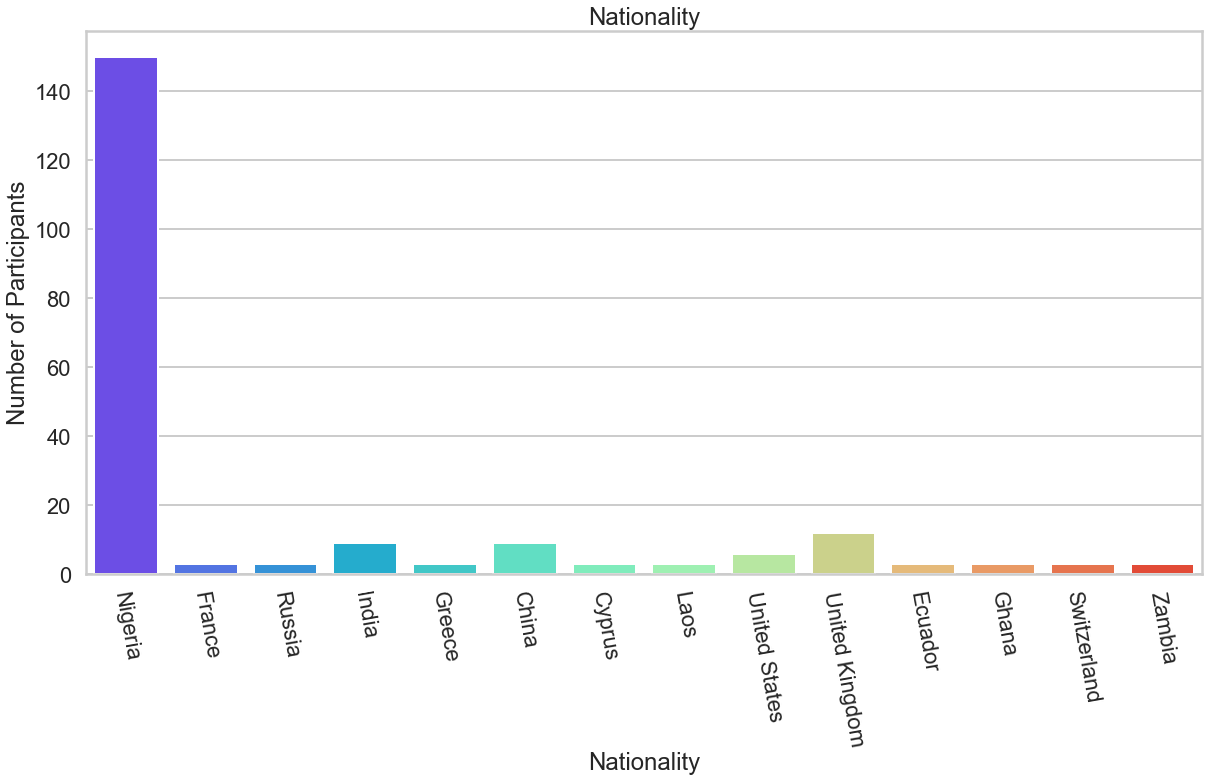

In [122]:
plt.figure(figsize=[20, 10])
sns.countplot(x = 'Q27', palette = 'rainbow', data = data)
plt.title('Nationality')
plt.ylabel('Number of Participants')
plt.xlabel('Nationality')

plt.xticks(rotation = 280)
#plt.yticks(np.arange(0, 50, 5))


plt.show()


From the frequency distribution table above, and the count plot/histogram, Most of the participants of this survey are from Nigeria, specifically 50 (70.4%) of them, followed by 4 people from the United Kingdom.






# 5 BIVARIATE ANALYSIS.
This is basically the comparison of two variables, to find the relationship they have with each other.

* I will comparing each of these variables; LOA, age, sex, and nationality variables with the consistency measures:
    1. CR
    2. Congruence
    3. Dissonance
    4. Koczkodaj.
    
    

## 5.1 Numerical Variables
* Bivariate means 2 variable analysis, when we pick 2 variables, we look at the relationship they have among themselve or whether they even seem to have a relationship or not.
* 2 Popular way of looking at 2 variables together:
    1. Scatter Plots:It indicates the type (linear or non-linear) and strenght of relationship between 2 variables.

    2. Correlation Matrix: It gives the linear correlation coefficient (-1 to +1) between all pairs of variables of our dataset. If x1 increases as x2 increases, that is a positive correlation (near 1) between x1 and x2, similarly if x1 decreases as x2 decreases, they have a negative correlation (near -1). If the change is random, then the coefficient of correlation will be (near 0). 
    
    
## 5.2 Categorical Variables

* I will be comparing the categorical variables using two things.
    1. Crosstab: A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables, a crosstab is also known as a contingency table.


    2. Side by side bar charts: Side-By-Side bar charts are used to display two categorical variables. It is a visual chart of the information in a crosstable/contigency table.


## 5.1.1 Numerical Variables - Scatter plot.
We have, the variables describing age, and level of agreeement.


## A. AGE
### A.1.  Age vs CR.

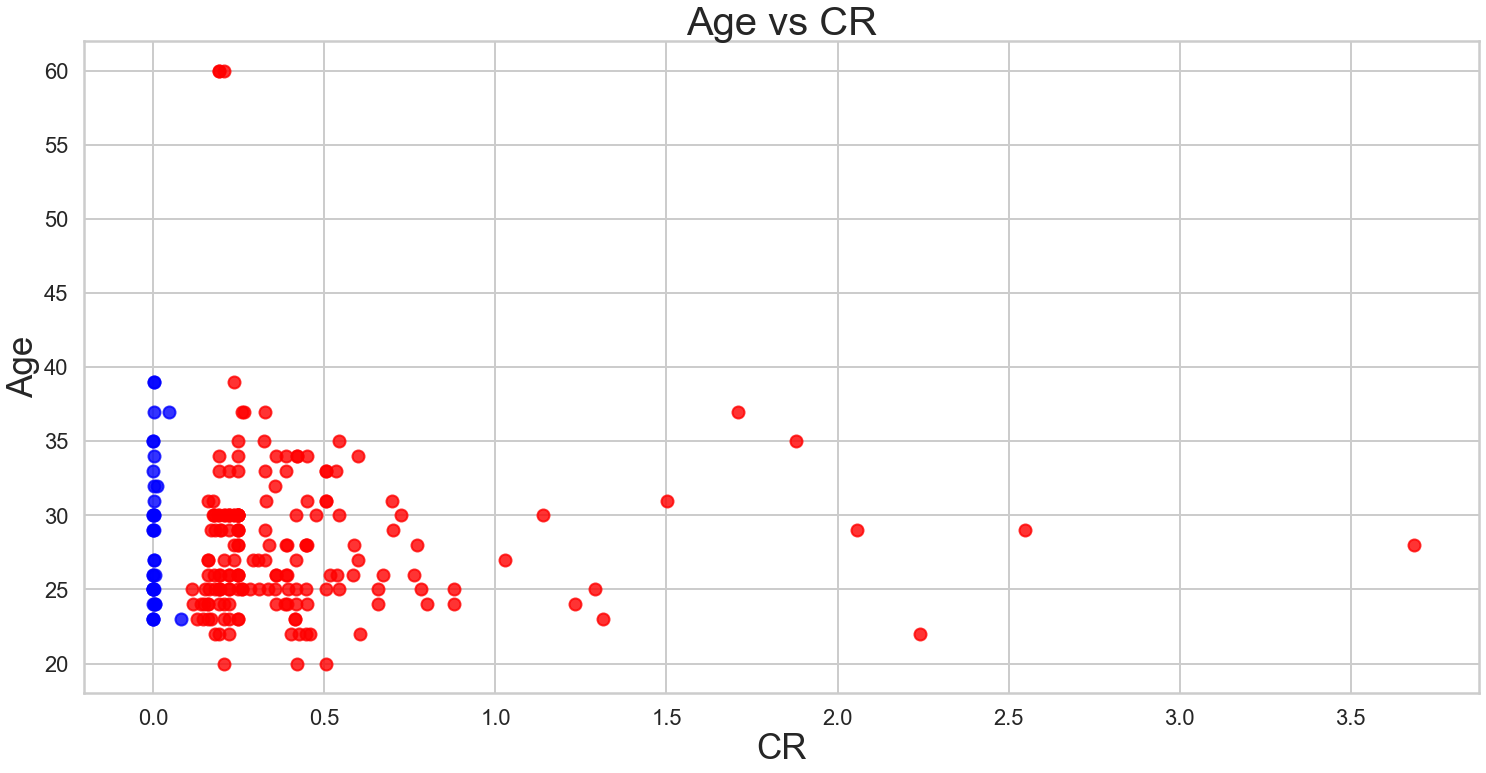

In [124]:
plt.figure(figsize = (25, 12))


plt.scatter(data[(data['CR'] > 0.1)]['CR'], data[(data['CR'] > 0.1)]['Q26'], alpha = 0.8, c = 'red')
plt.scatter(data[(data['CR'] <= 0.1)]['CR'], data[(data['CR'] <= 0.1)]['Q26'], alpha = 0.8, c = 'blue')

plt.title('Age vs CR', fontsize =40)
plt.ylabel('Age', fontsize = 35)
plt.xlabel('CR', fontsize = 35)

#plt.xticks(np.arange(0, 2.6, 0.1))

plt.show()

In [125]:
print("The number of participants with a CR value of 0.1 or less: " +  str(len(data[(data['CR'] <= 0.1)])) + ' participants' )

The number of participants with a CR value of 0.1 or less: 36 participants


The lower the CR value, the more consistent a participant is. 0 means perfect consistency. 

The CR consistency measure has a threshold of 0.1, that is any participant with a CR value of 0.1 or less is consistent.

From the plot above, The participants with a CR value of 0.1 or less are the ones in colour blue, while those greater than 0.1 are in colour red. The red ones are more than the blue ones. 

For the CR consistency measure, both sets of participants (consistent and inconsistent) ones span all ages. Both the youngest and oldest participant in our data set are belong to thte inconsistent set. So it seems age doesn't really have an effect on the consistency of participants.

Although the two most inconsistent people to the far right of the plot are both under 30 years of age, so maybe younger people tend to be more inconsistent.

###  A.2 Age VS Congruence

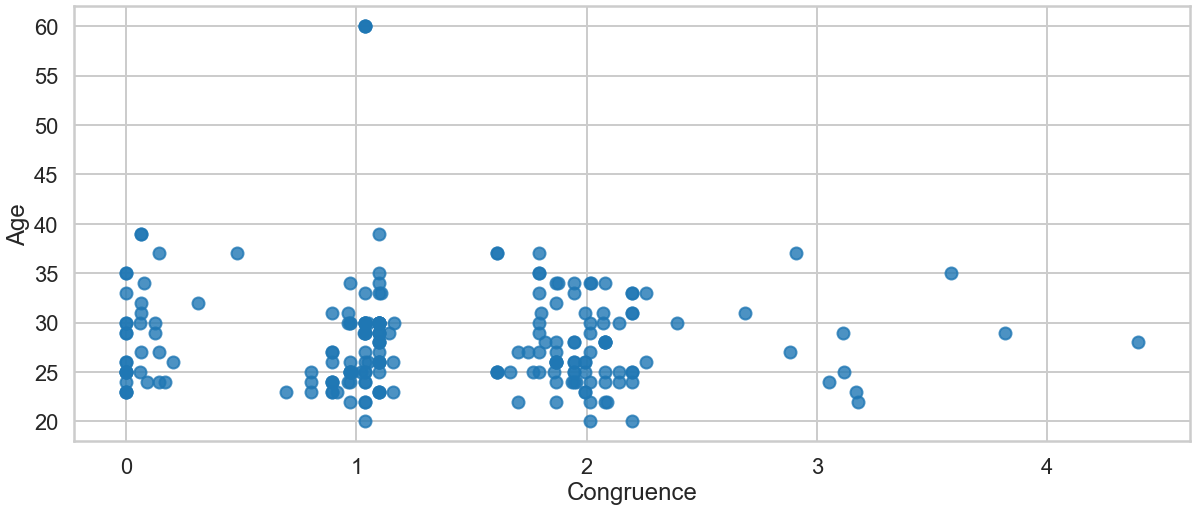

In [126]:
plt.figure(figsize = (20, 8))


plt.scatter(data['Congruence'], data['Q26'], alpha = 0.8)
plt.ylabel('Age')
plt.xlabel('Congruence')

plt.show()

For the congruence measure, most of the particpant are inconsistent. 

Both consistent and inconsistent participants span all ages, although the most incosistent particpants are in their 20s. So maybe younger people tend to be more inconsistent. 

The younger ones are still learning about life, making mistakes, etc. Which is why they might be more inconsistent.

### A.3. Age VS Dissonance.

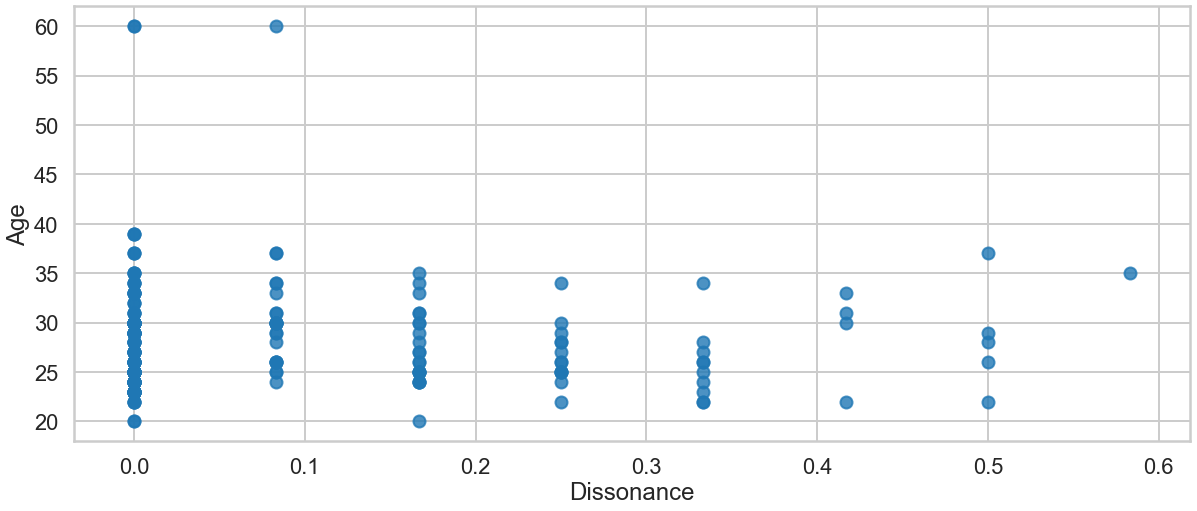

In [127]:
plt.figure(figsize = (20, 8))


plt.scatter(data['Dissonance'], data['Q26'], alpha = 0.8)
plt.ylabel('Age')
plt.xlabel('Dissonance')

plt.show()

Quite a lot of the participants according to the dissonance measure are consistent.



### A.4. Age Vs Koczkodaj

The Koczkodaj consistency measure has a threshold of 1/3 (0.33333).



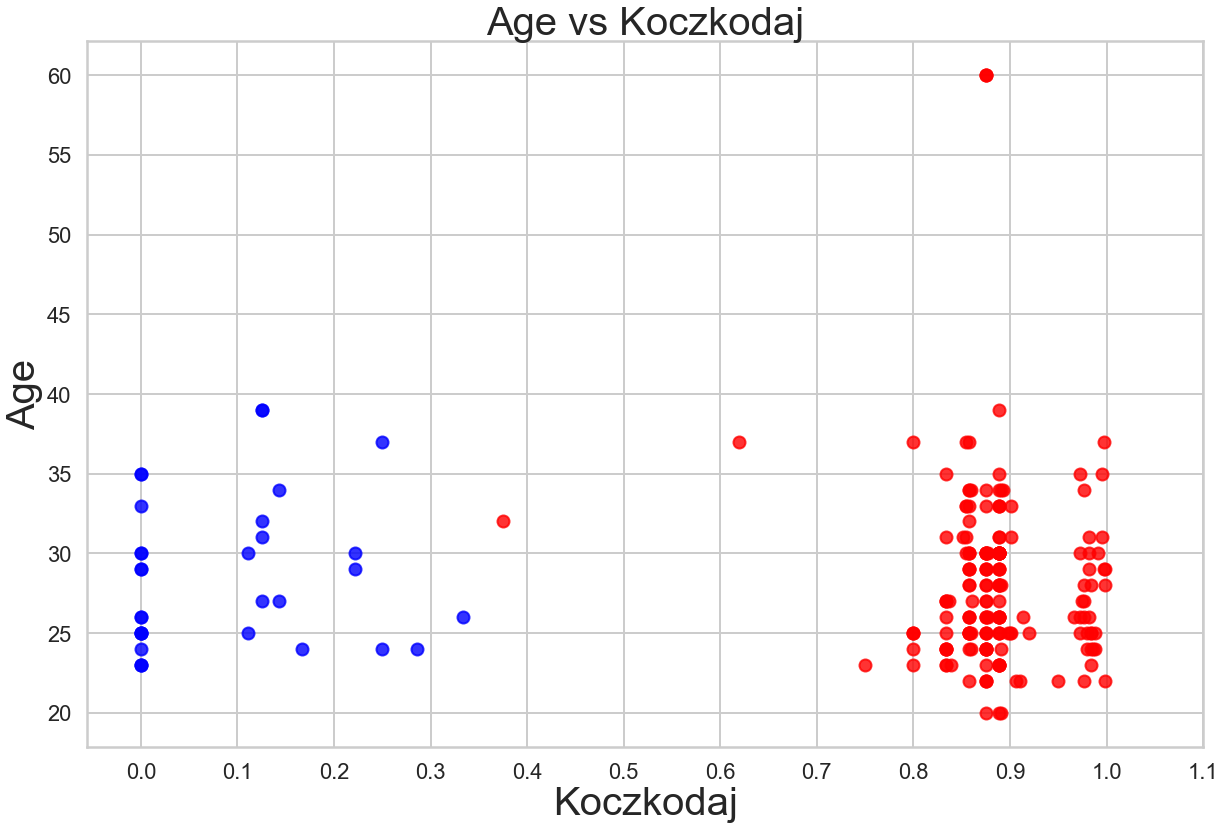

In [128]:
#Threshold for the Kockodaj variable = 1/3

plt.figure(figsize = (20, 13))

#plt.scatter(data['Koczkodaj'], data['Q26'], alpha = 0.8)
plt.scatter(data[(data['Koczkodaj'] <= 1/3)]['Koczkodaj'], data[(data['Koczkodaj'] <= 1/3)]['Q26'], alpha = 0.8, c ='blue')
plt.scatter(data[(data['Koczkodaj'] > 1/3)]['Koczkodaj'], data[(data['Koczkodaj'] > 1/3)]['Q26'], alpha = 0.8, c ='red')

plt.title('Age vs Koczkodaj', fontsize = 40)
plt.ylabel('Age', fontsize = 40)
plt.xlabel('Koczkodaj', fontsize = 40)


plt.xticks(np.arange(0, 1.2, 0.1))
plt.show()

From the plot above, according to the Koczkodaj consistency measure, most of the participants are inconsistent, they have Koczkodaj values greater than 0.33.

Yet again, age doesn't seem to have much effect on the consistency of particpants, more data should show whether it does or not.

# Correlation Matrix

## Level of Agreement (LOA)
I will be making a correlation matrix to compare the variable describing the level of agreement of the participants, to all the consistency measures in the dataset

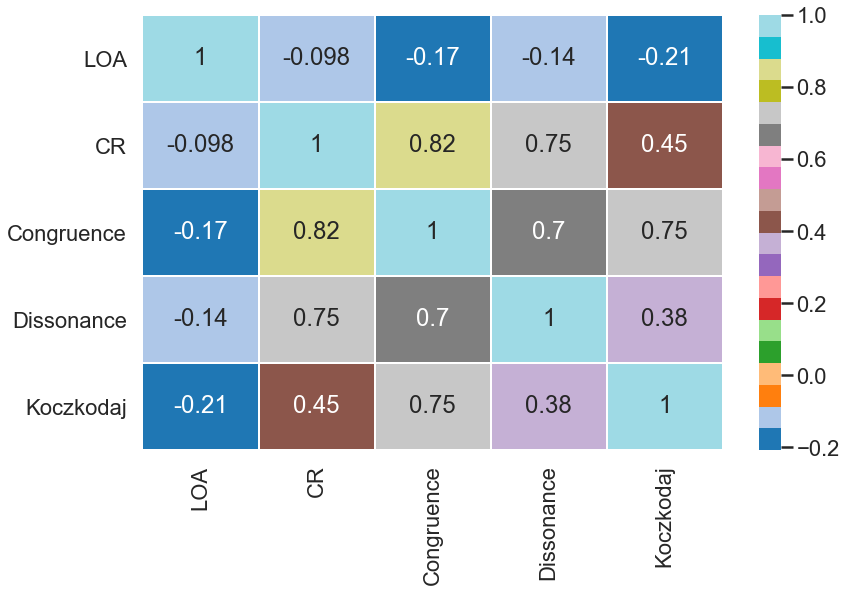

In [129]:
num_variables = ['LOA', 'CR', 'Congruence', 'Dissonance', 'Koczkodaj']

plt.figure(figsize=[13, 8])
ax = sns.heatmap(data[num_variables].corr(), annot = True, cmap="tab20", lw = 1)

#### LOA vs CR.
The level of agreement variable and the CR variable have a correlation coefficient of **-0.098**, this correlation coeffiecient is not that high, but it shows that as the level of agreement of a participant is increasing their CR value will be reducing by a value of 0.098


#### LOA vs Congruence
The correlation coefficient here is **-0.17**. As the level of agreement of a participant increases, the congruence of that participant is reducing by a value of 0.17


#### LOA vs Dissonance.
The correlation coefficient of LOA and dissonance is **-0.14**, another negative correltion. The higher the level of agreeement is, the lower the dissonance of a participant is, specifically for every increase in LOA by a value of 1, dissonance reduces by a value of 0.14


#### LOA vs Koczkodaj.
Another negative correlation. The correlation coefficient of LOA with Koczkodaj is **-0.21**.
As LOA increases, Koczkodaj of participants reduces by a value of 0.21



Then I will be highlighting the variables with high correlations.

#### CR and Congruence
The CR variable and the Congruence variable: These two are highly correlated with a corraltion coefficient of **0.82**, that means an increase in a participant's CR value leads to an increase in their Congruence value also, and vice versa.


#### CR and Dissonance
The CR variable and the Dissonance variable: These two variables are highly correlated with a correlalation coefficient of **0.75**. An increase in a participant's Dissonance value leads to an increase in their CR value also, and vice versa.

#### Congruence and Koczkodaj
There is a really high correlation between these two variables, an increase in the congruence value of a participant leads to an increase in the Koczkodaj value of the participant. They have a correlation coefficient of **0.75**.


#### Congruence and Dissonance
These two variables also have a high correlation coefficient of **0.7**, they are linearly related which means, an increase in the congruence value of a participants leads to an increase in their dissonance value.

## 5.2. Categorical Variables
We have, the variables describing Sex, and Nationality.
I will be comparing both variables to the different consistency measures.
The variables describing sex and nationality are both categorical variables, so I will be comparing it to the categorical versions of the consistency measures that were created earlier.




### A. Sex
### A.1 Sex vs CR.
I will make a class to create the cross table and the side by side bar charts for the two categorical variables being considered.


This class will have two functions, one for making the crosstable, and the other function for making the side by side bar chart.

In [130]:
#Class for bivariate analysis of 
class BivariateCategorical ():
    """A class to create the crosstable, and a side by side bar chart of two categorical variables"""
    #Definition of all the arguments that will be used in this Class
    #variable1 = First categorical variable
    #Variable2 = Second categorical variable.
    #rownames = Name that will be on the index/rows
    #colnames = Name/title for the column headers
    #
    
    
    def __init__(self, variable1, variable2):
        #Initializing the attributes of the class.
        self.variable1 = variable1
        self.variable2 = variable2
        
        
    def crosstab(self, rownames, colnames):
        """Making the crosstable of two categorical variables."""
        crosstable = pd.crosstab(data[self.variable1], data[self.variable2], 
                                 rownames = rownames, 
                                 colnames = colnames)
    
        return crosstable
        
    def side_barchart(self, title, palette, labels):
        """Making the side by side bar charts of two categorical variables"""
        plt.figure(figsize=[20, 10])
        sns.countplot(x = data[self.variable2], data = data, hue = self.variable1, palette = palette)

        plt.legend(title = title, loc='upper right', labels = labels)
        #plt.title("Amount of time spent childcaring/home schooling and the Subjective wellbeing of respondents")
        plt.xlabel(self.variable2, fontsize = 30)

        plt.ylabel('Number of Participants', fontsize = 30)
        plt.show()

In [131]:
CR_vs_sex = BivariateCategorical(variable1 = 'Q25', variable2 = 'CR_group')

CR_vs_sex.crosstab(rownames = ['Sex'], colnames = ['CR'])

CR,Low,Medium,High
Sex,,,
Female,19,83,3
Male,17,88,3


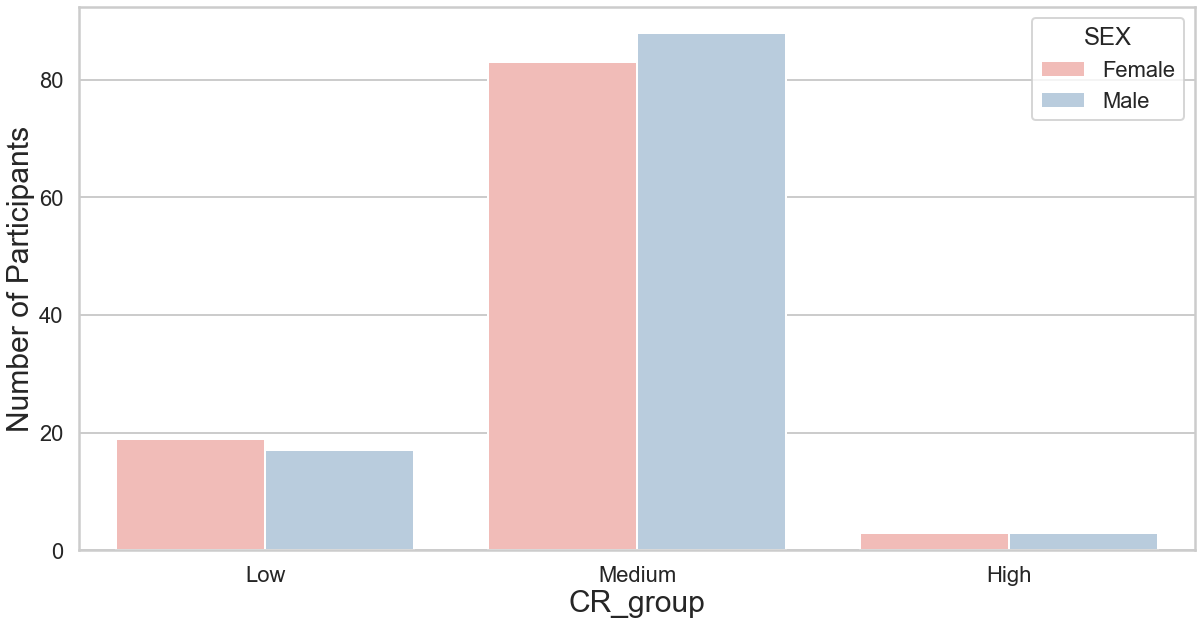

In [132]:
CR_vs_sex.side_barchart(palette = 'Pastel1', title = 'SEX', labels = ['Female', 'Male'])

From the chart and the cross table above, Few men and women had low CR values. 6 males are consistent, while 10 females are also consistent, so it seems females are generally more consistent than males.

Although only females had high CR values.


### A.2 Sex vs Congruence.

In [133]:
congruence_vs_sex = BivariateCategorical(variable1 = 'Q25', variable2 = 'Congruence_group')

congruence_vs_sex.crosstab(rownames = ['Sex'], colnames = ['Congruence'])

Congruence,Low,Medium,High
Sex,,,
Female,29,69,7
Male,34,70,4


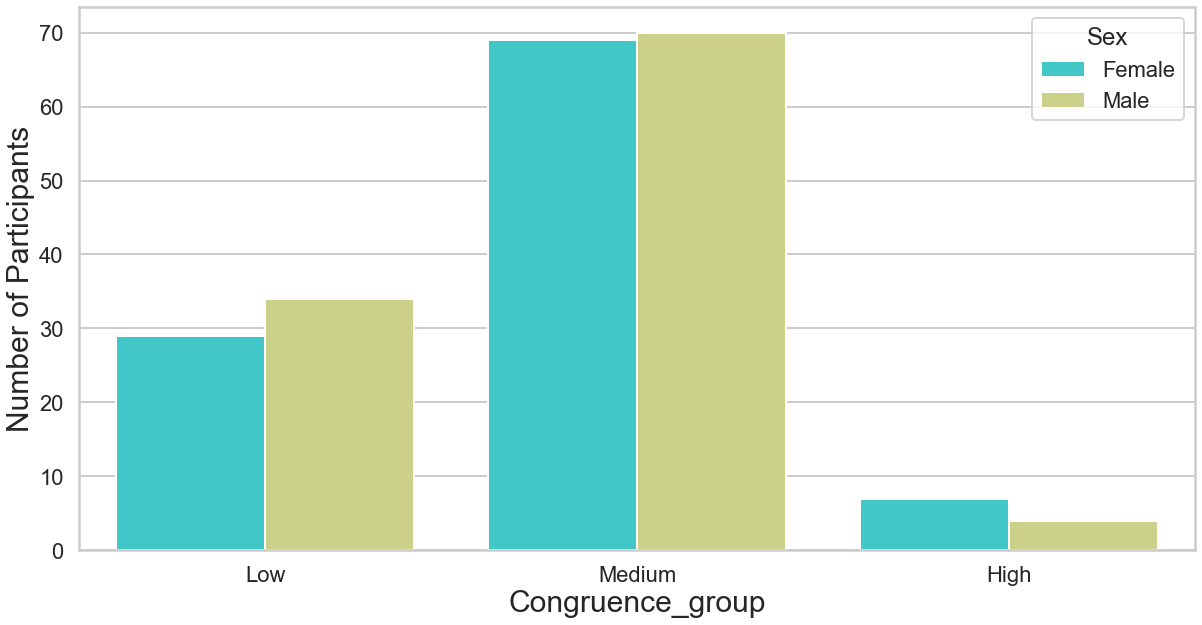

In [134]:
congruence_vs_sex.side_barchart(palette = 'rainbow', title = 'Sex', labels =['Female', 'Male'])

Few females and males had low congruence values.

Two more females than males had low congruence values.

While just 2 females had a high congruence value, no males had a high congruence value.



### A.3 Sex vs Dissonance.

In [135]:
dissonance_vs_sex = BivariateCategorical(variable1 = 'Q25', variable2 = 'Dissonance_group')

dissonance_vs_sex.crosstab(rownames = ['Sex'], colnames = ['Dissonance'])

Dissonance,Low,Medium,High
Sex,,,
Female,88,6,11
Male,91,8,9


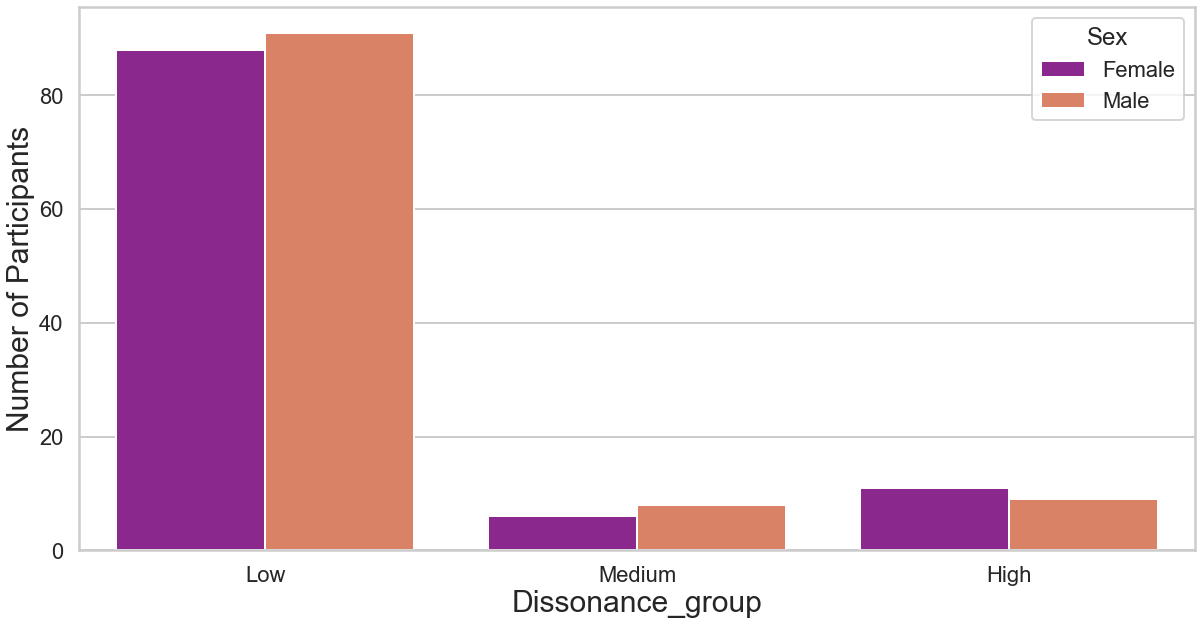

In [136]:
dissonance_vs_sex.side_barchart(palette = 'plasma', title = 'Sex', labels = ['Female', 'Male'])

In the comparison of the dissonance consistency measure and the sex of the participants of the survey, majority and equal number (31) of both males and females had a low dissonance values. Although for this particular consistency measure, 2 males had high values for dissonance, and 3 females also had high values.




### A.4 Sex vs Koczkodaj

In [137]:
koczkodaj_vs_sex = BivariateCategorical(variable1 = 'Q25', variable2 = 'Koczkodaj_group')

koczkodaj_vs_sex.crosstab(rownames = ['Sex'], colnames = ['Koczkodaj'])

Koczkodaj,Low,High
Sex,,
Female,16,89
Male,16,92


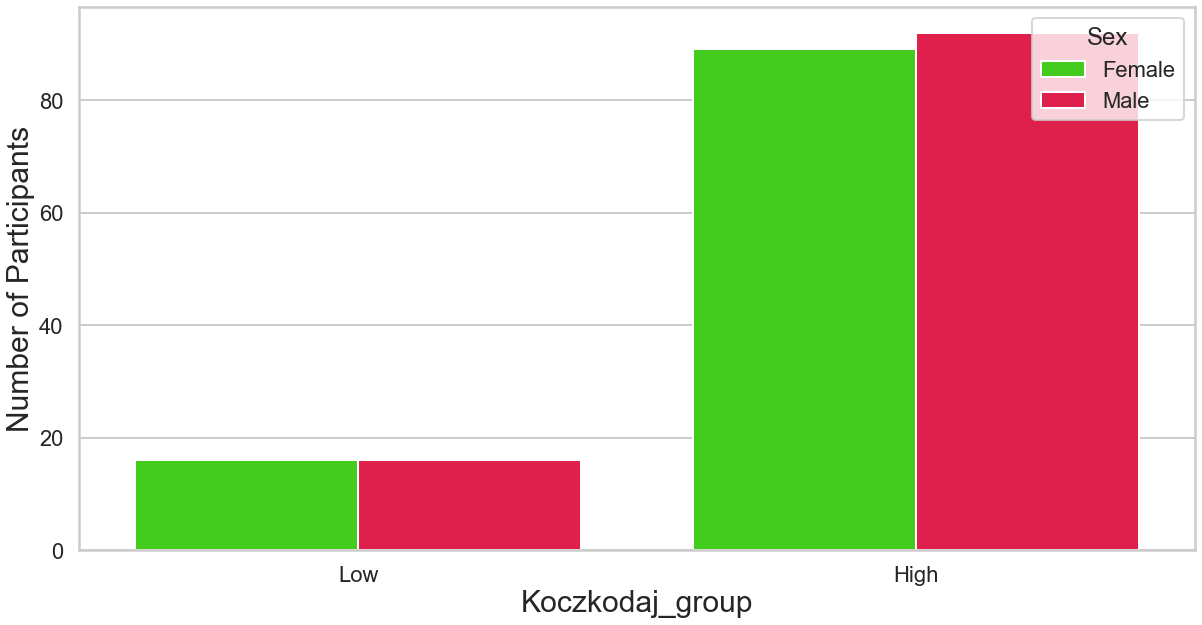

In [138]:
koczkodaj_vs_sex.side_barchart(palette = 'prism', title = 'Sex', labels = ['Female', 'Male'])

The Koczkodaj consistency measure has two categories, Low and High, and unlike all the other three consistency measures we have compared to the sex of the participants of the survey, most Females (26) and Males(30) had high values for this measure.
with more males than females having these high values.


9 Females and 6 males were consistent according to this measure. Of the inconsistent particpants, more of them were males.

It seems according to the Koczkodaj consistency measure, females are generally more consistent than males.




## B. Nationality

### B.1. Nationality vs CR.

In [139]:
CR_vs_nationality = BivariateCategorical(variable1 = 'Q27', variable2 = 'CR_group')

CR_vs_nationality.crosstab(rownames = ['Nationality'], colnames = ['CR'])

CR,Low,Medium,High
Nationality,,,
China,2,7,0
Cyprus,0,3,0
Ecuador,1,2,0
France,0,3,0
Ghana,0,3,0
Greece,0,3,0
India,4,5,0
Laos,0,3,0
Nigeria,24,121,5


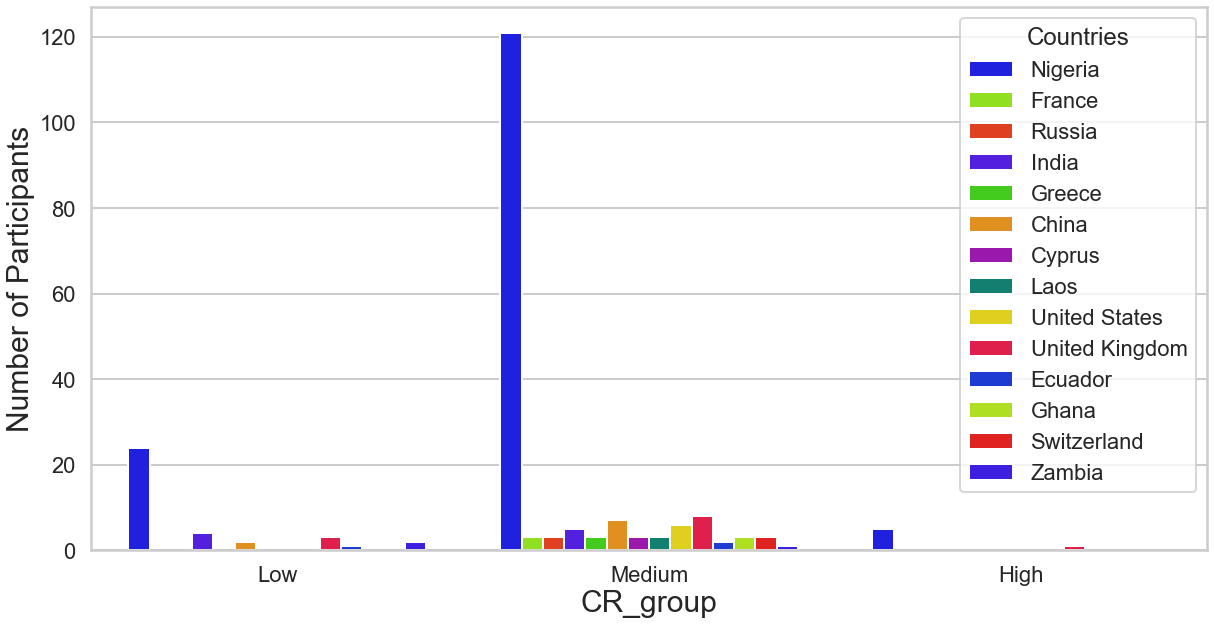

In [140]:
CR_vs_nationality.side_barchart(palette = 'prism', title = 'Countries', 
                                 labels = ['Nigeria', 'France', 'Russia', 'India', 'Greece', 'China',
                                                   'Cyprus', 'Laos', 'United States', 'United Kingdom', 'Ecuador',
                                                    'Ghana', 'Switzerland', 'Zambia'])

We have participants from 14 different countries of the world, most of these participants are from Nigeria.
Looking at the table and the plot above, Nigerians had the highest number for all three categories of the CR consistency measure, with majority of these Nigerians having a low CR value.

Two Nigerians had high CR values, these 2 participants are the only participants that had high values for the CR consistency measure amongst all the participants of the survey.

Most of the other nations that were underepresented didn't have low CR values.


### B.2. Nationality vs Congruence.

In [141]:
congruence_vs_nationality = BivariateCategorical(variable2 = 'Congruence_group', variable1 = 'Q27')

congruence_vs_nationality.crosstab(rownames = ['Nationality'], colnames = ['Congruence'])

Congruence,Low,Medium,High
Nationality,,,
China,3,6,0
Cyprus,0,2,1
Ecuador,1,1,1
France,1,2,0
Ghana,0,3,0
Greece,2,1,0
India,4,4,1
Laos,3,0,0
Nigeria,42,101,7


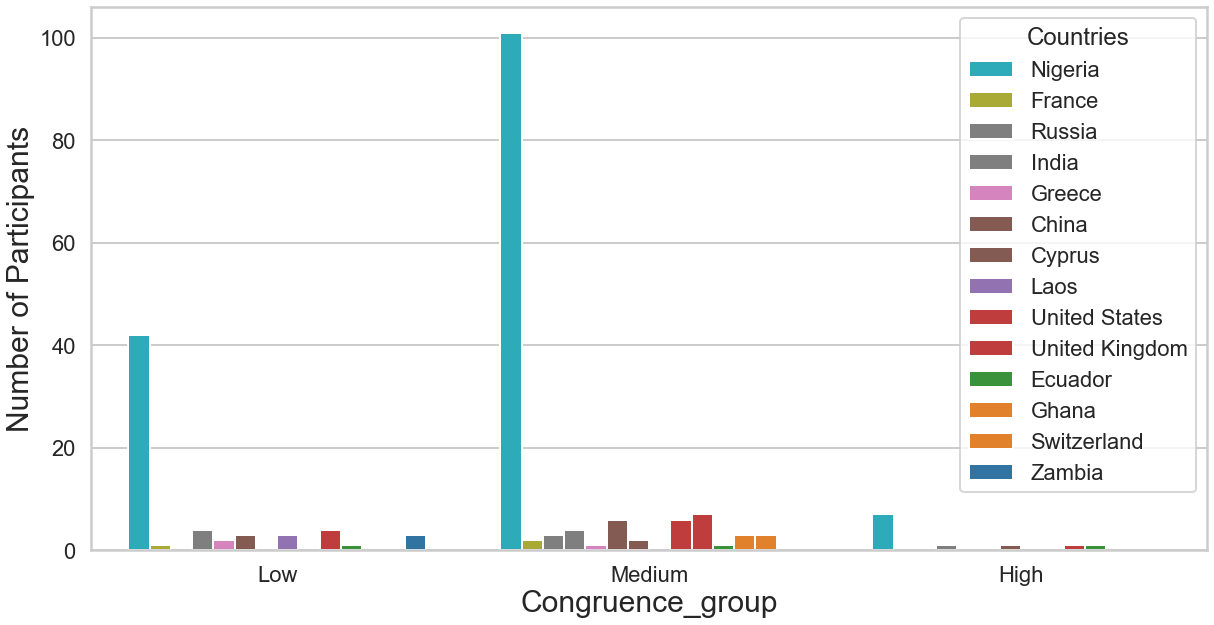

In [142]:
congruence_vs_nationality.side_barchart(palette = 'tab10_r', title = 'Countries', 
                                        labels = ['Nigeria', 'France', 'Russia', 'India', 'Greece', 'China',
                                                   'Cyprus', 'Laos', 'United States', 'United Kingdom', 'Ecuador',
                                                    'Ghana', 'Switzerland', 'Zambia'])

Only the participants that are from Nigeria had a high value for the congruence consistency measure, Nigerians also had the highest numbers of all the participants that belonged to the low and medium congruence values.

14 Nigerians had low congruence values, while 34 of them had medium congruence values, and just 2 had high congruence values.



### B.3. Dissonance vs Nationality.

In [143]:
dissonance_vs_nationality = BivariateCategorical(variable2 = 'Dissonance_group', variable1 = 'Q27')

dissonance_vs_nationality.crosstab(rownames = ['Nationality'], colnames = ['Dissonance'])

Dissonance,Low,Medium,High
Nationality,,,
China,6,0,3
Cyprus,2,0,1
Ecuador,1,1,1
France,3,0,0
Ghana,3,0,0
Greece,2,1,0
India,8,0,1
Laos,3,0,0
Nigeria,129,10,11


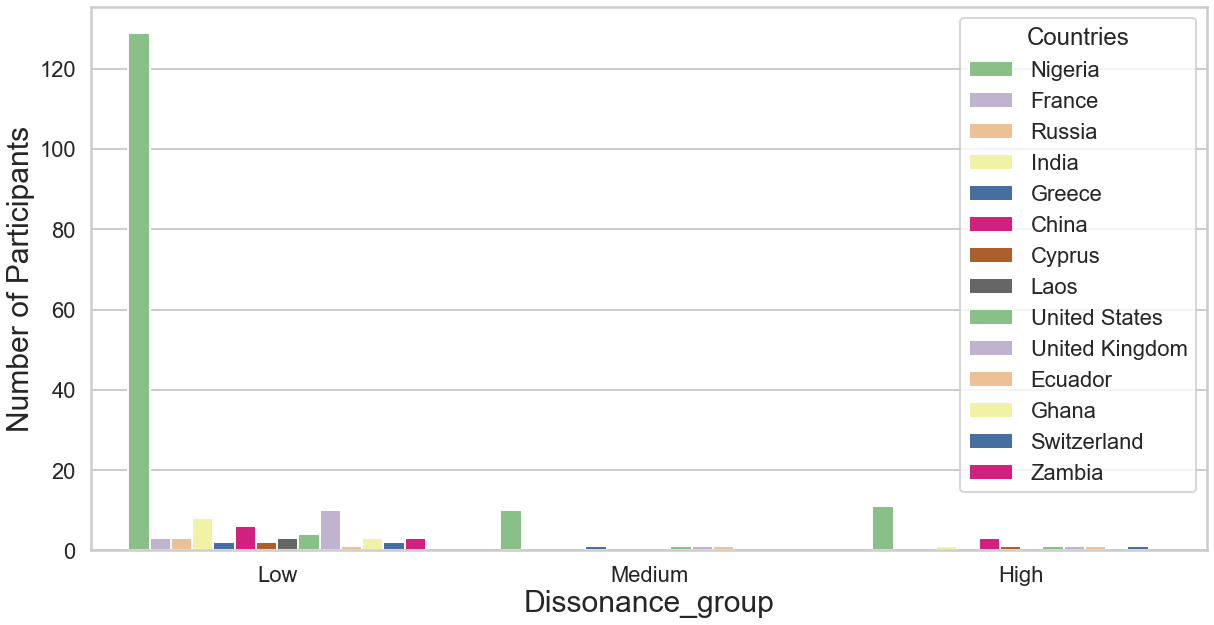

In [144]:
dissonance_vs_nationality.side_barchart(palette = 'Accent', title = 'Countries', 
                                        labels = ['Nigeria', 'France', 'Russia', 'India', 'Greece', 'China',
                                                   'Cyprus', 'Laos', 'United States', 'United Kingdom', 'Ecuador',
                                                    'Ghana', 'Switzerland', 'Zambia'])

Apart from participants from Nigeria, only two other participants from two other nations, one Swiss and one Chinese had high dissonance values.


Majority had low dissonance values. 


The only participant from Switzerland had a high dissonance level.



### B.4. Koczkodaj vs Nationality



In [145]:
koczkodaj_vs_nationality = BivariateCategorical(variable2 = 'Koczkodaj_group', variable1 = 'Q27')

koczkodaj_vs_nationality.crosstab(rownames = ['Nationality'], colnames = ['Koczkodaj'])

Koczkodaj,Low,High
Nationality,,
China,1,8
Cyprus,0,3
Ecuador,1,2
France,0,3
Ghana,0,3
Greece,0,3
India,4,5
Laos,0,3
Nigeria,22,128


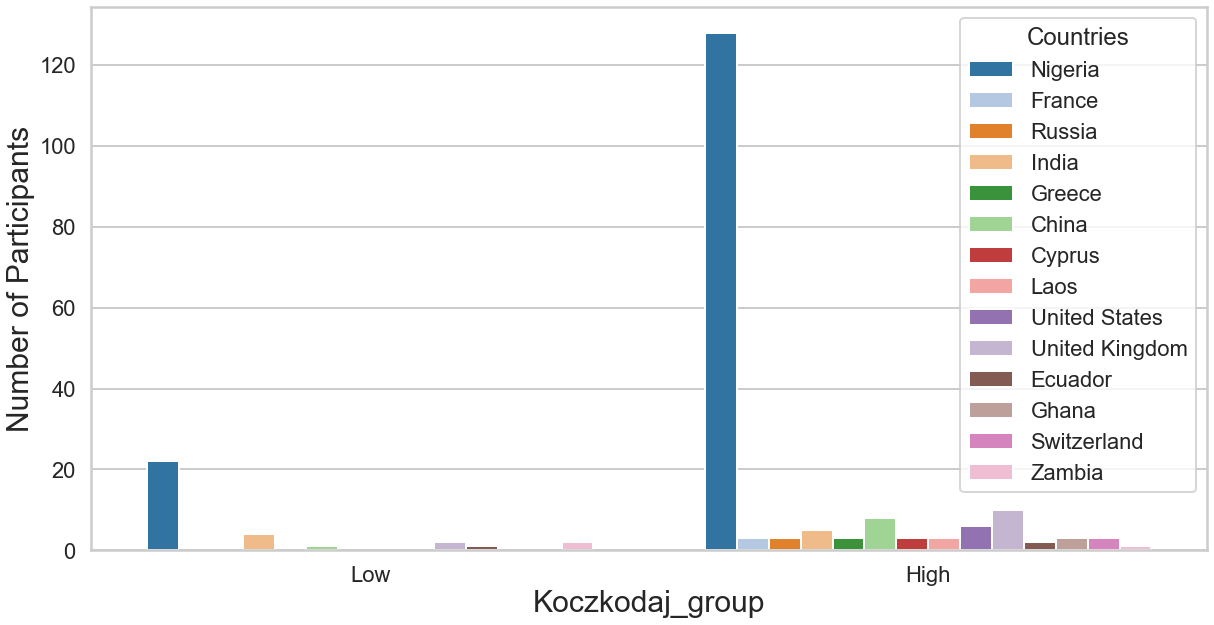

In [146]:
koczkodaj_vs_nationality.side_barchart(palette = 'tab20', title = 'Countries', 
                                        labels = ['Nigeria', 'France', 'Russia', 'India', 'Greece', 'China',
                                                   'Cyprus', 'Laos', 'United States', 'United Kingdom', 'Ecuador',
                                                    'Ghana', 'Switzerland', 'Zambia'])

Majority of the participants had high Koczkodaj values, majority of them are Nigerians.


Only five countries including Nigeria had participants with low Koczkodaj values.

Only two countries, Ecuador and Zambia didn't have participants with high Koczkodaj values.